In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [67]:
data = pd.read_csv('creditcard.csv')
data_original = data.copy()
print(data.shape)
display(data.head())

(284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### EDA

distribution of the Class

0    0.998273
1    0.001727
Name: Class, dtype: float64


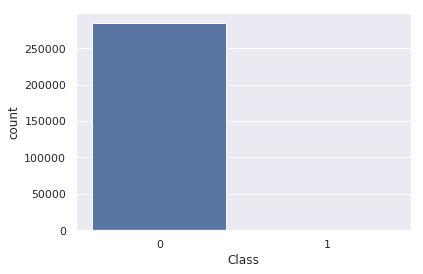

In [69]:
print(data['Class'].value_counts(normalize=True))
sns.countplot(data['Class']);

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


checking for null values

In [6]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [70]:
X = data.drop('Class', axis=1)
y = data['Class']

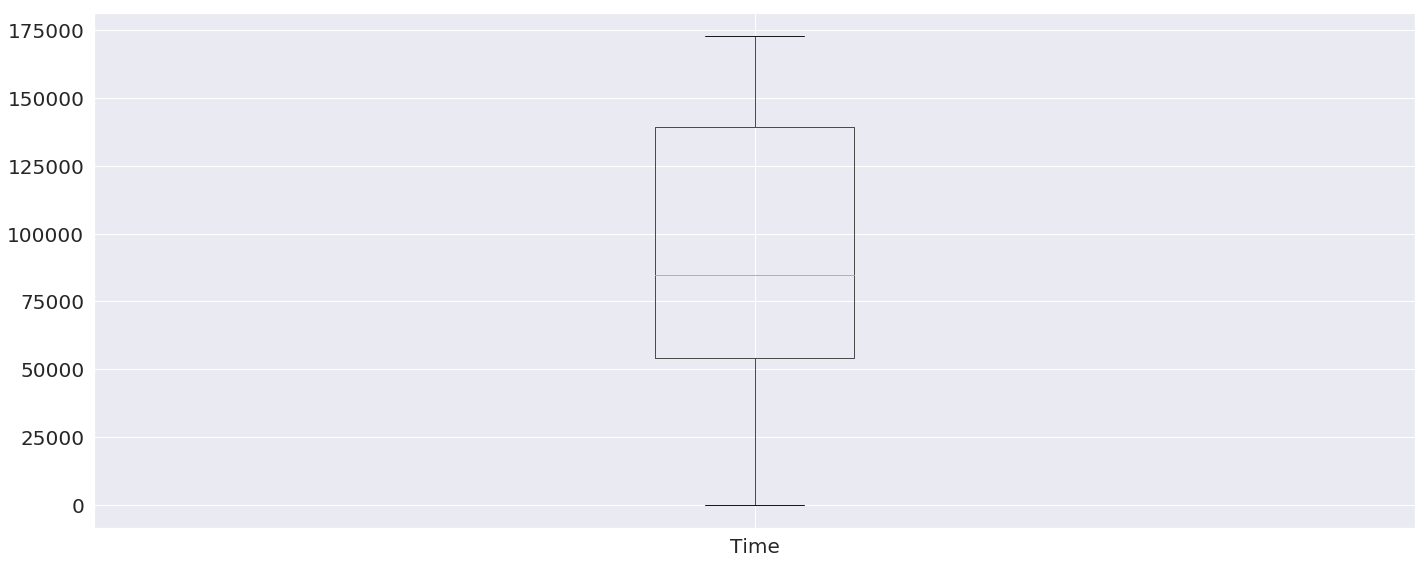

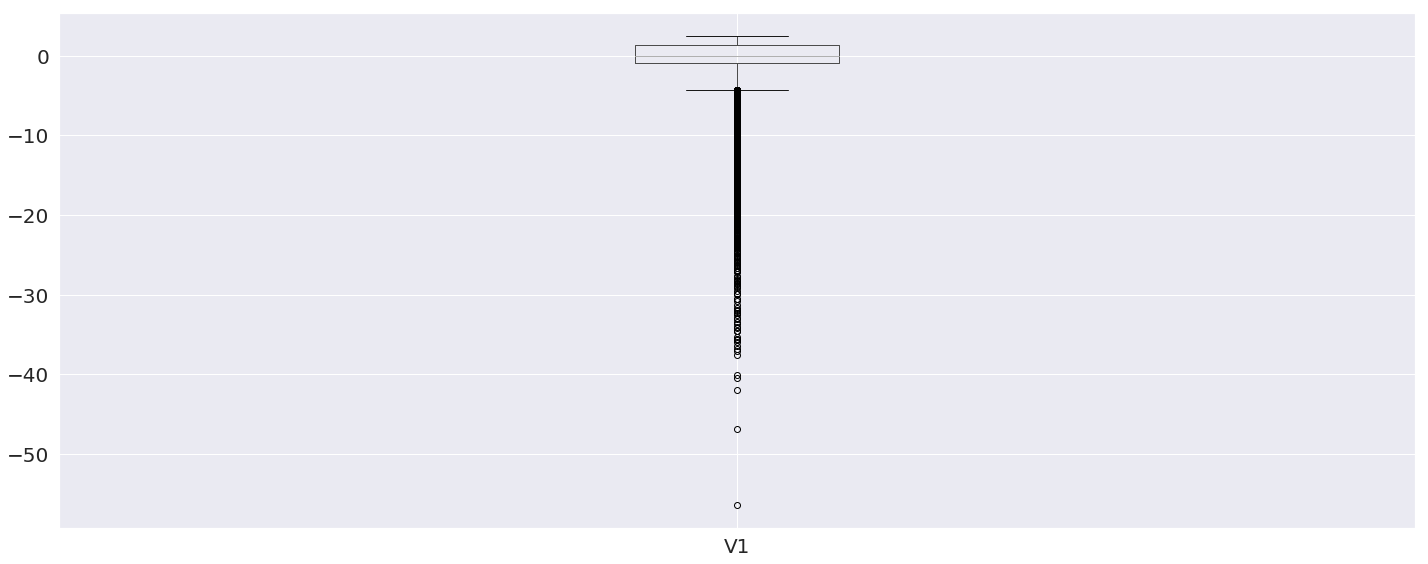

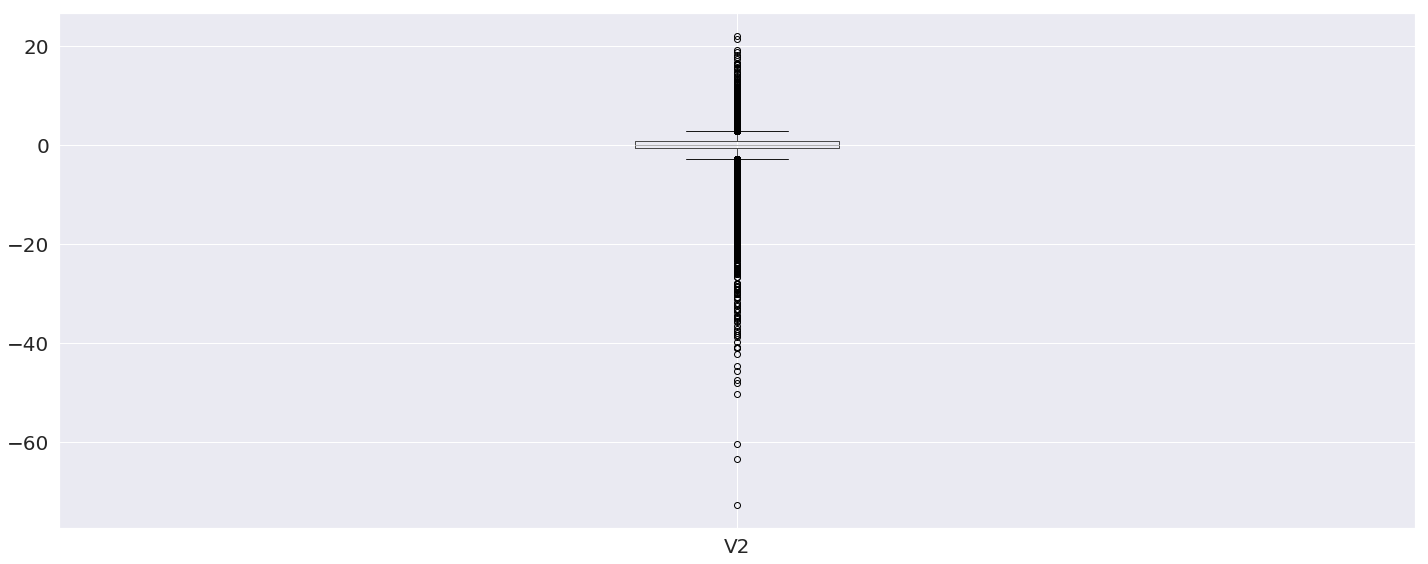

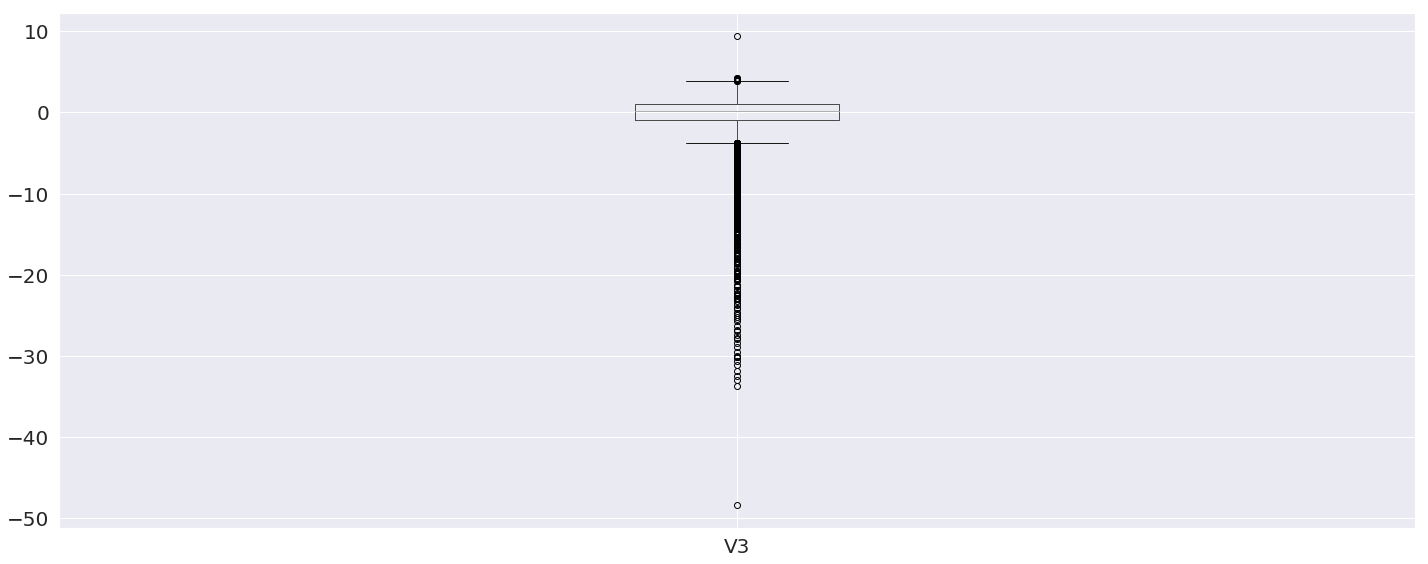

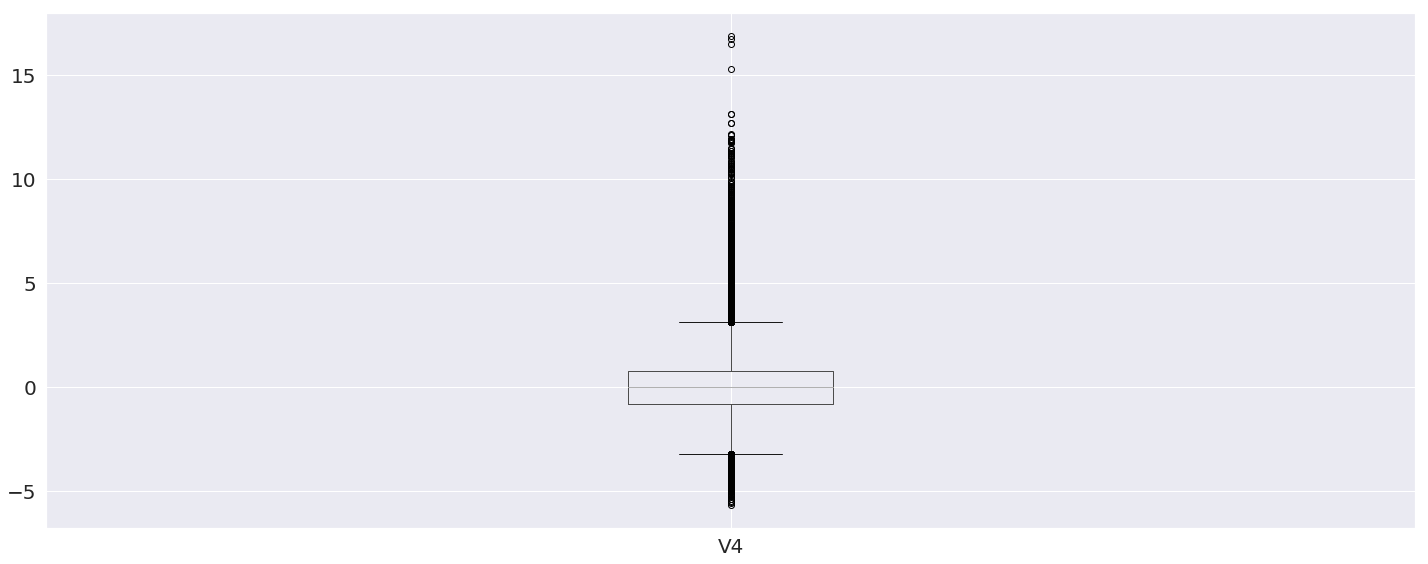

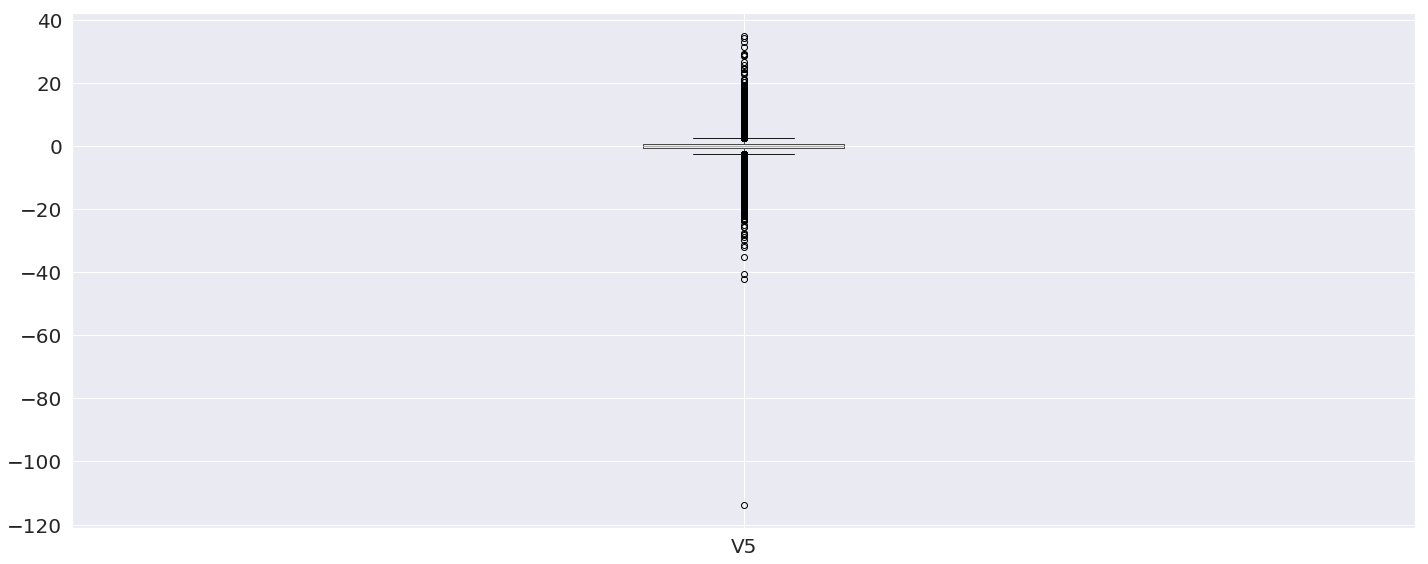

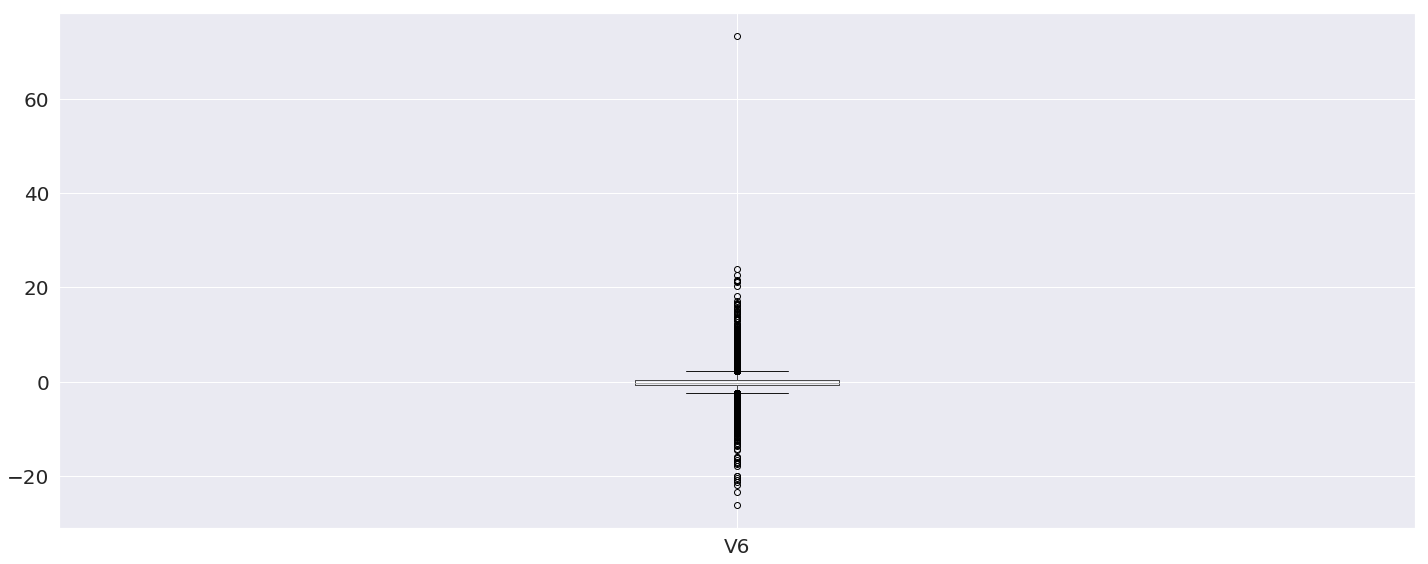

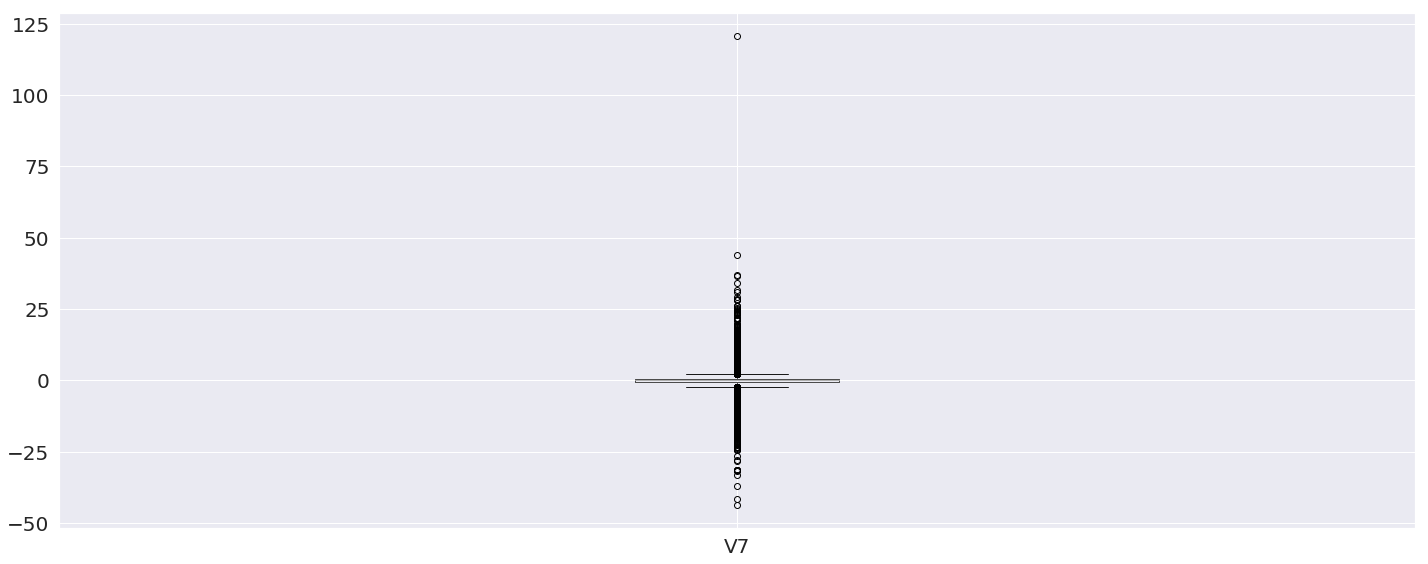

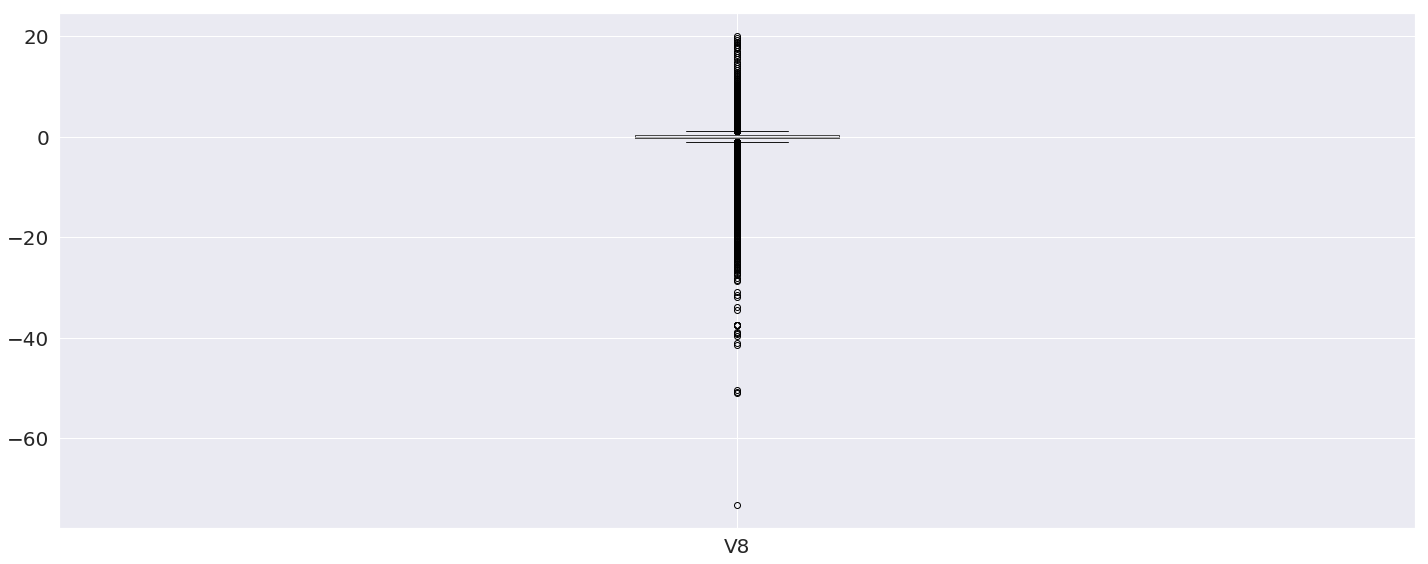

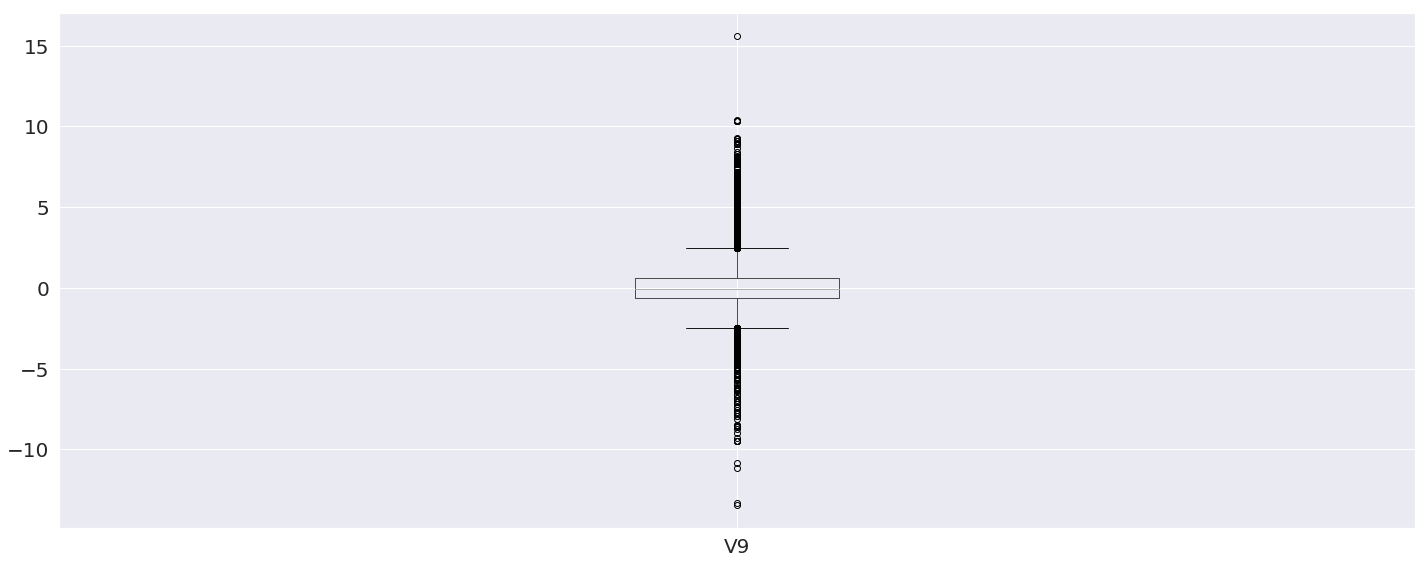

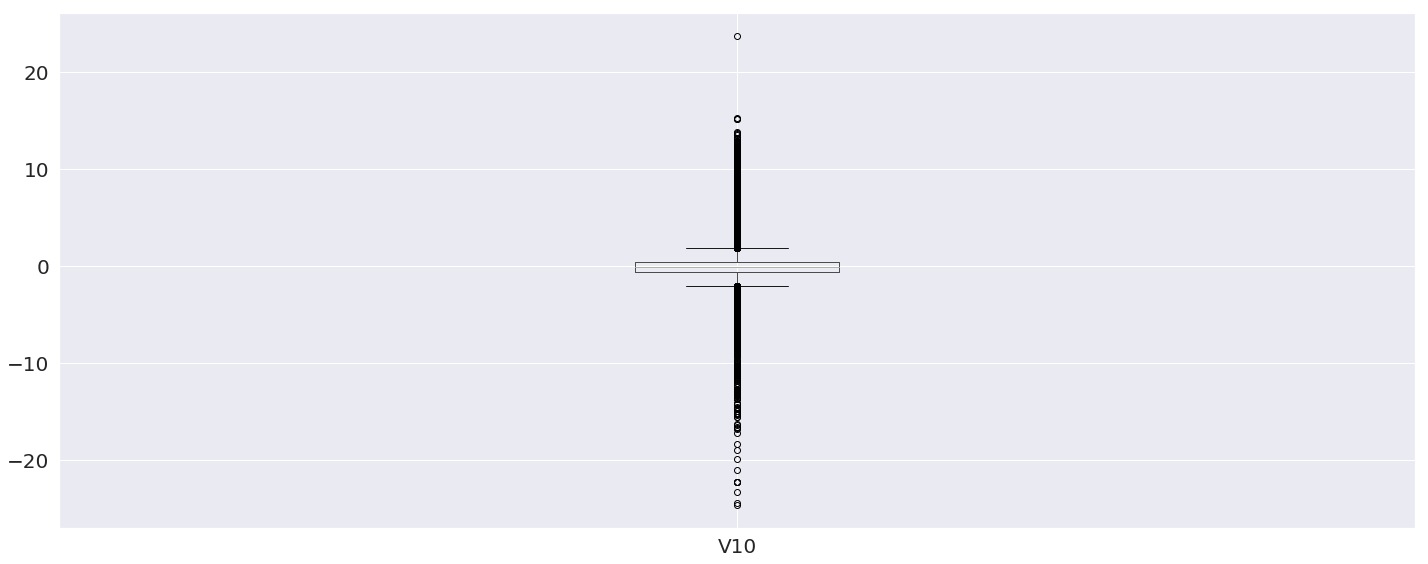

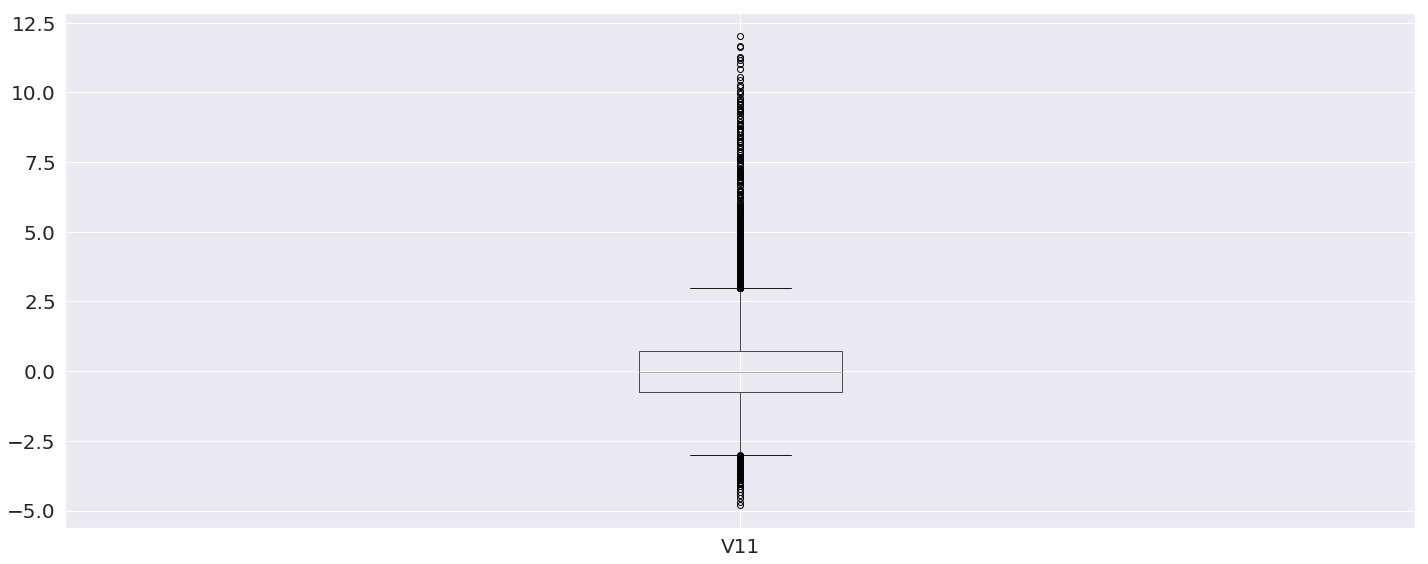

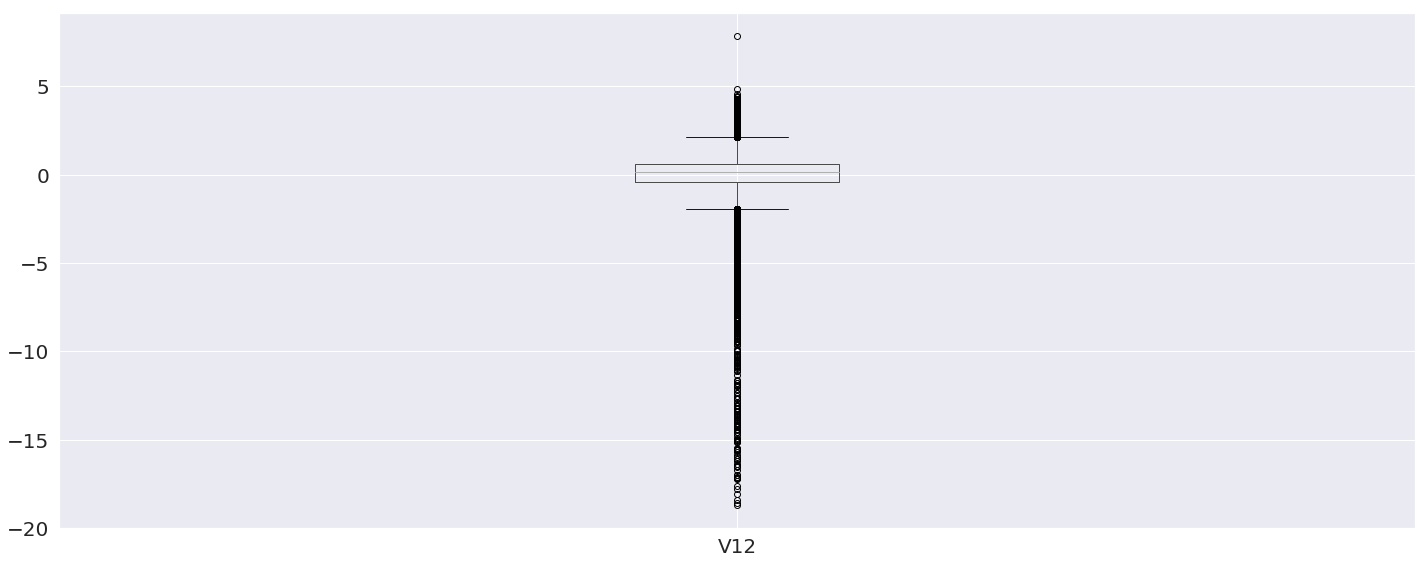

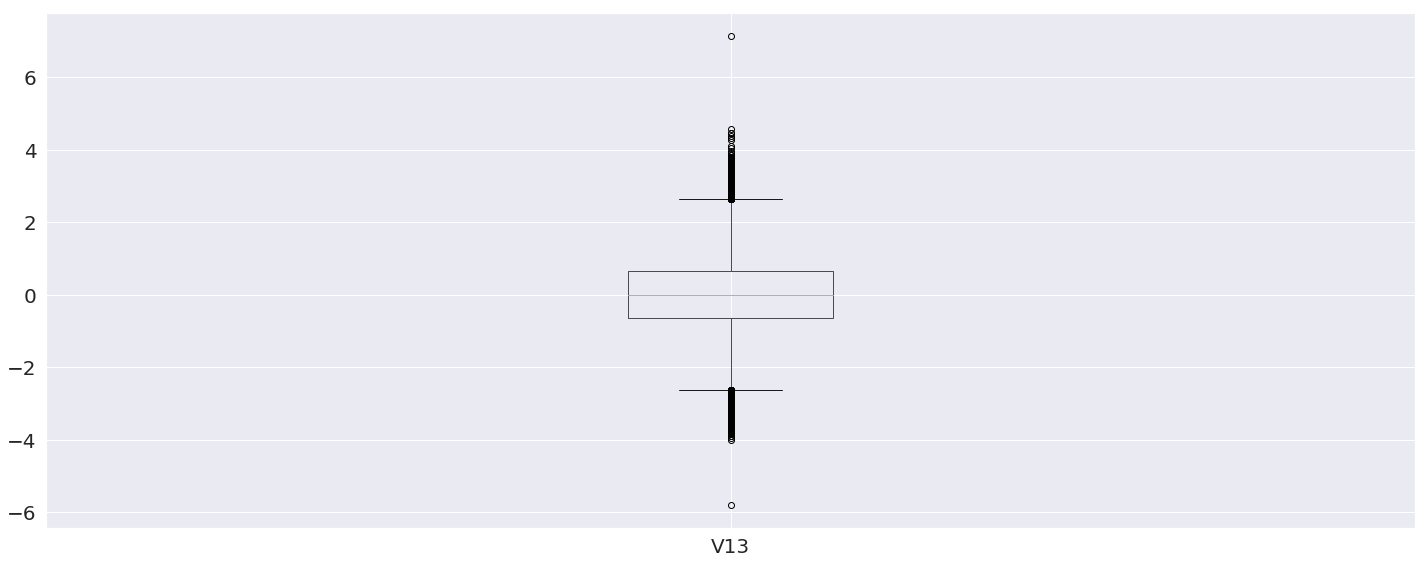

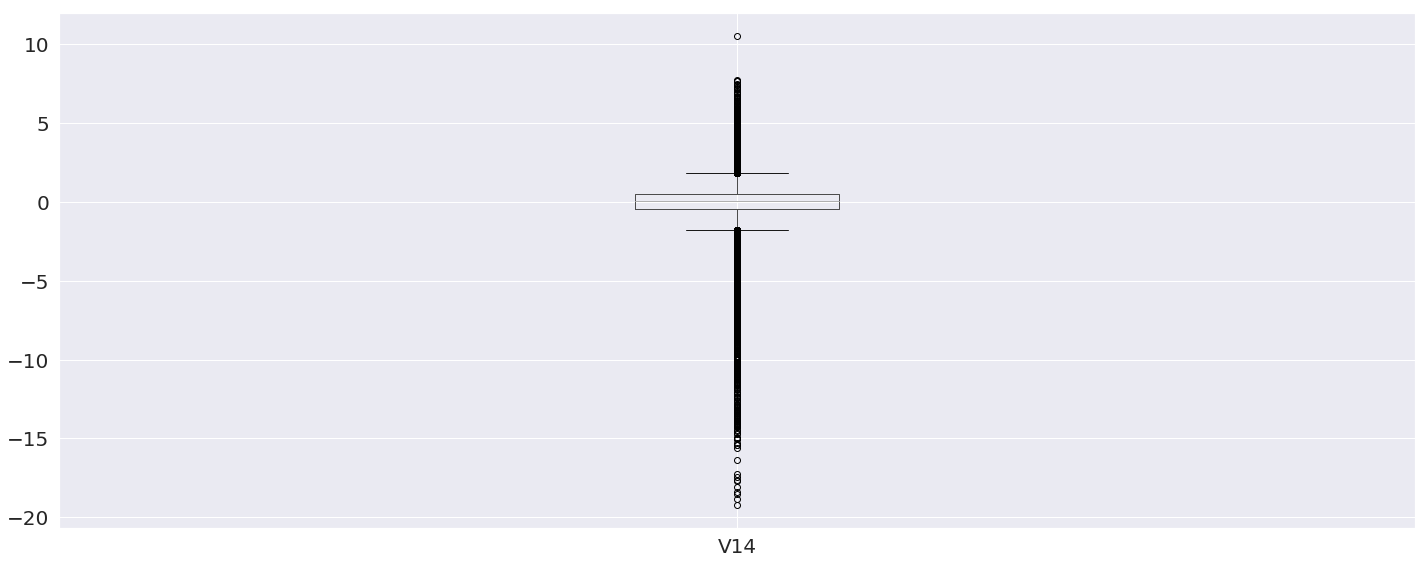

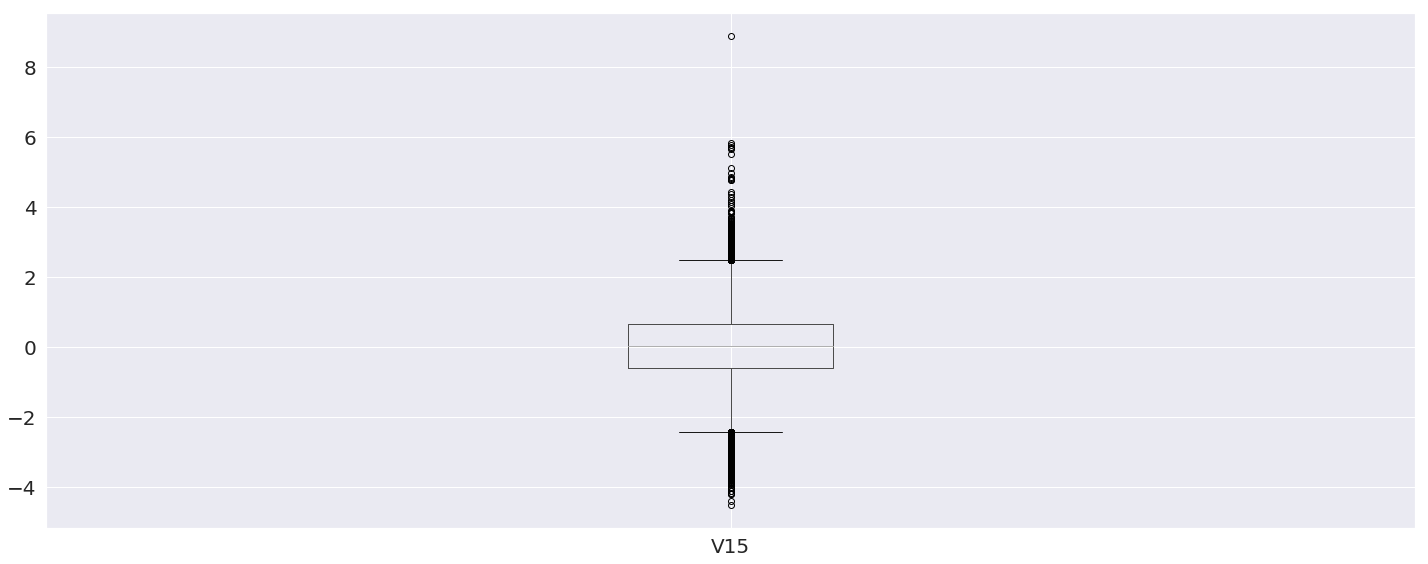

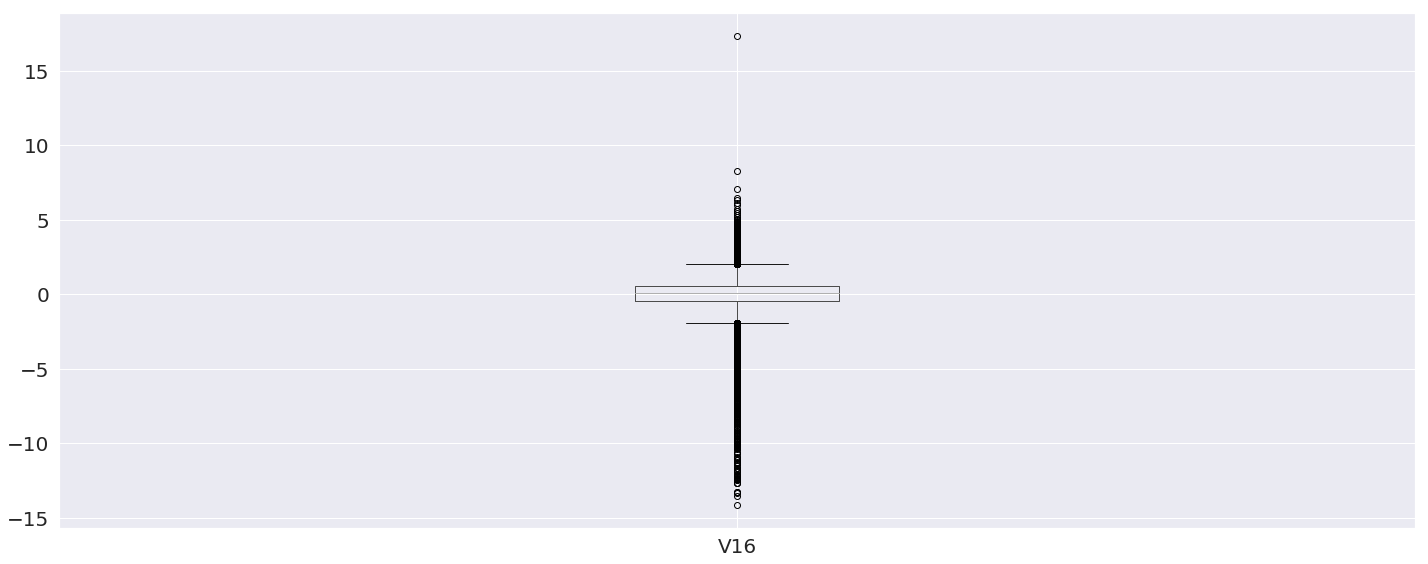

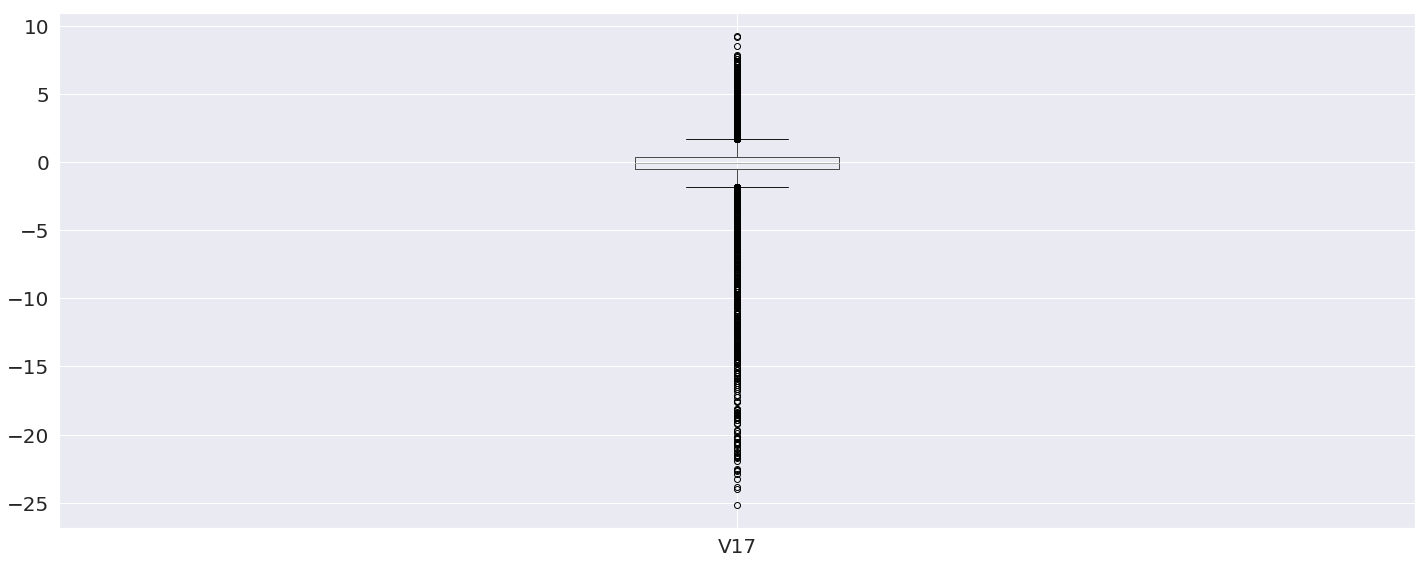

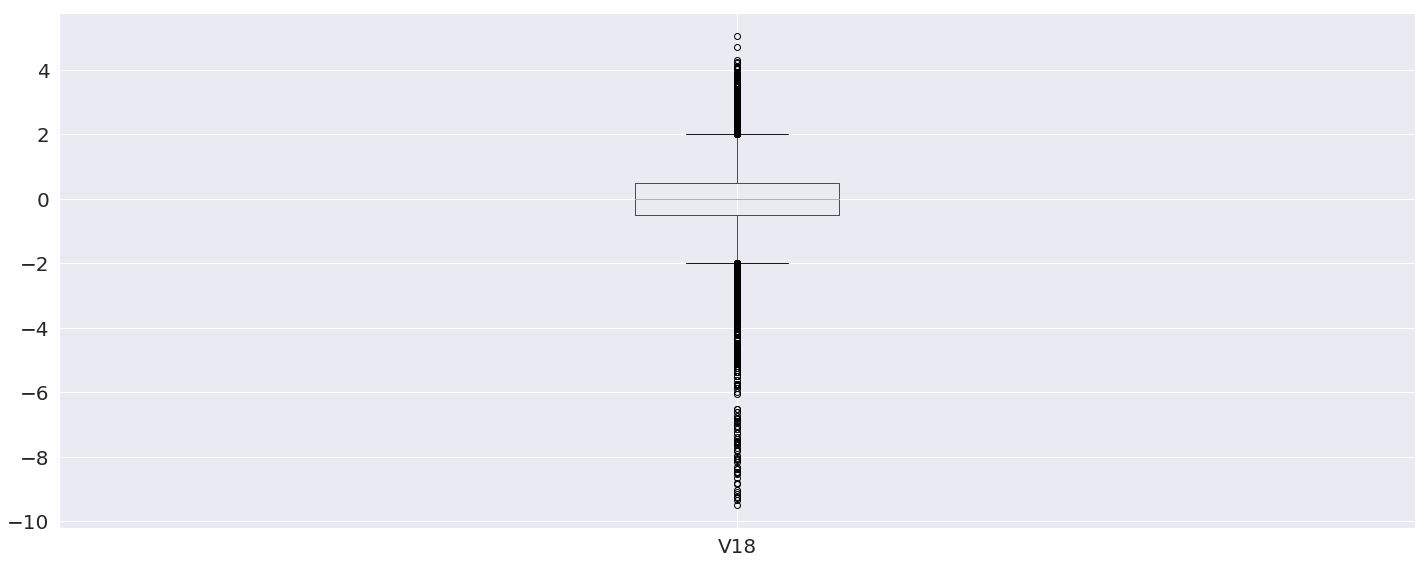

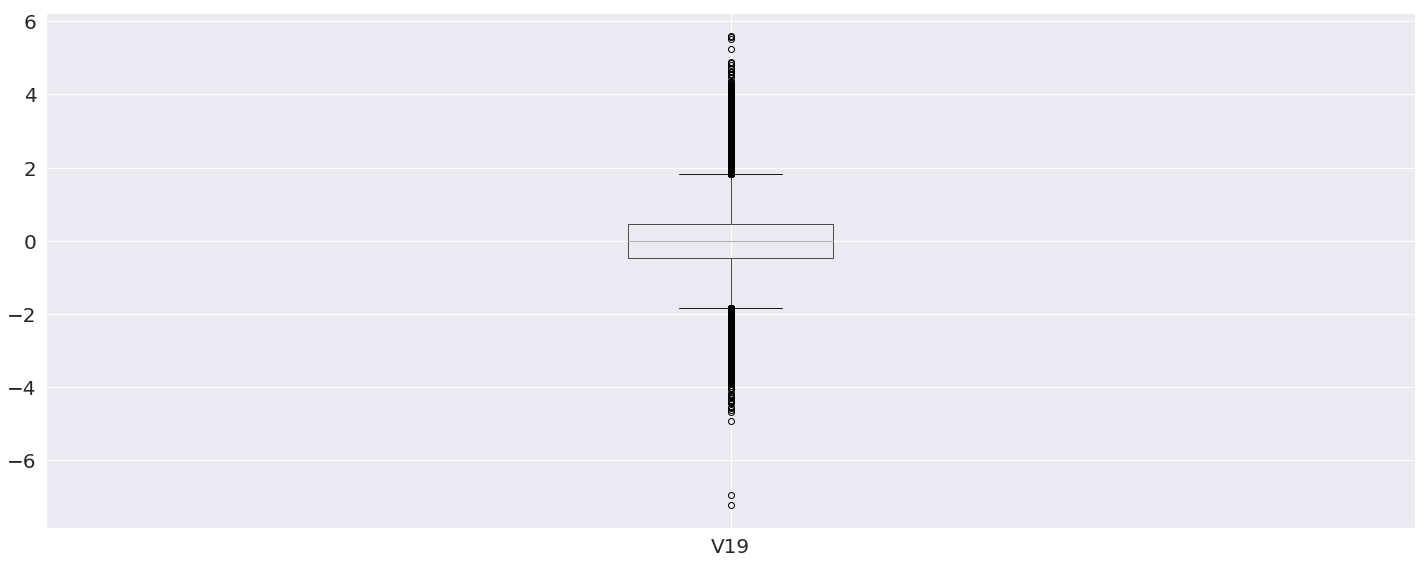

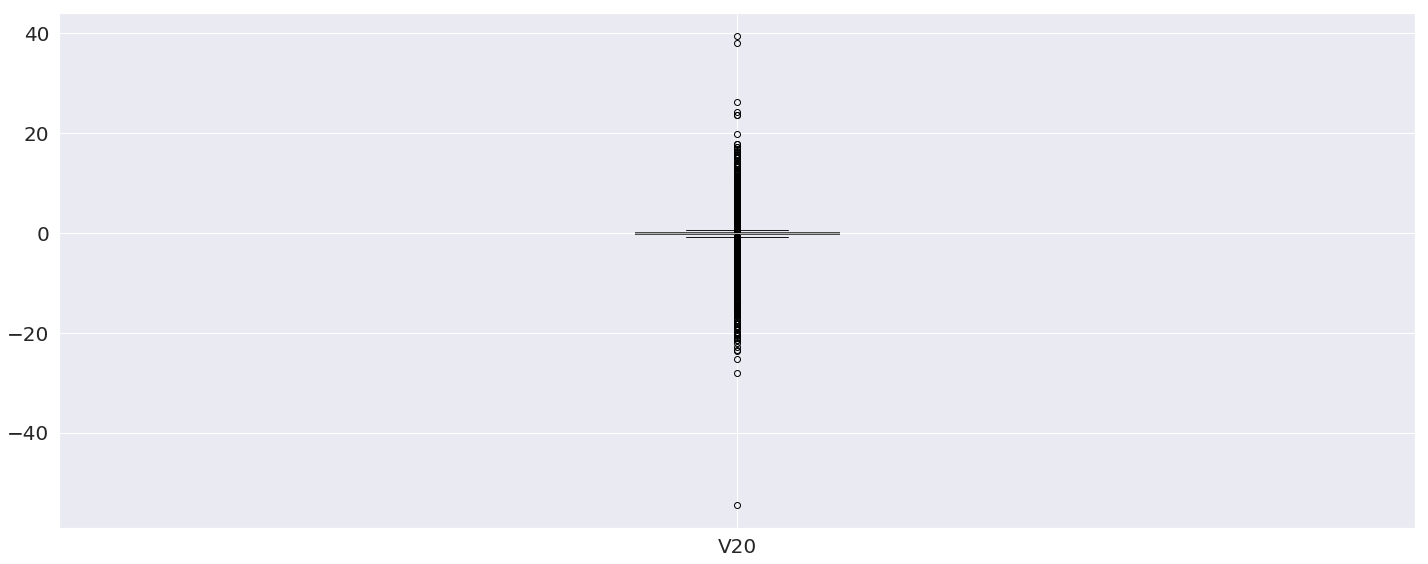

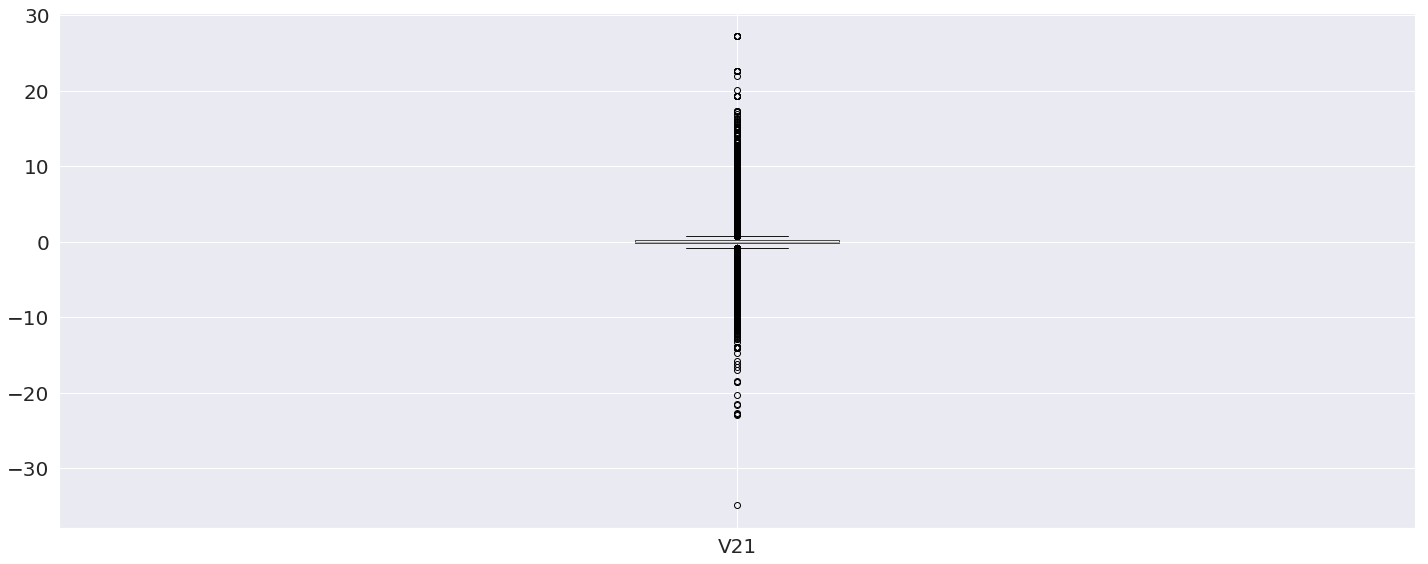

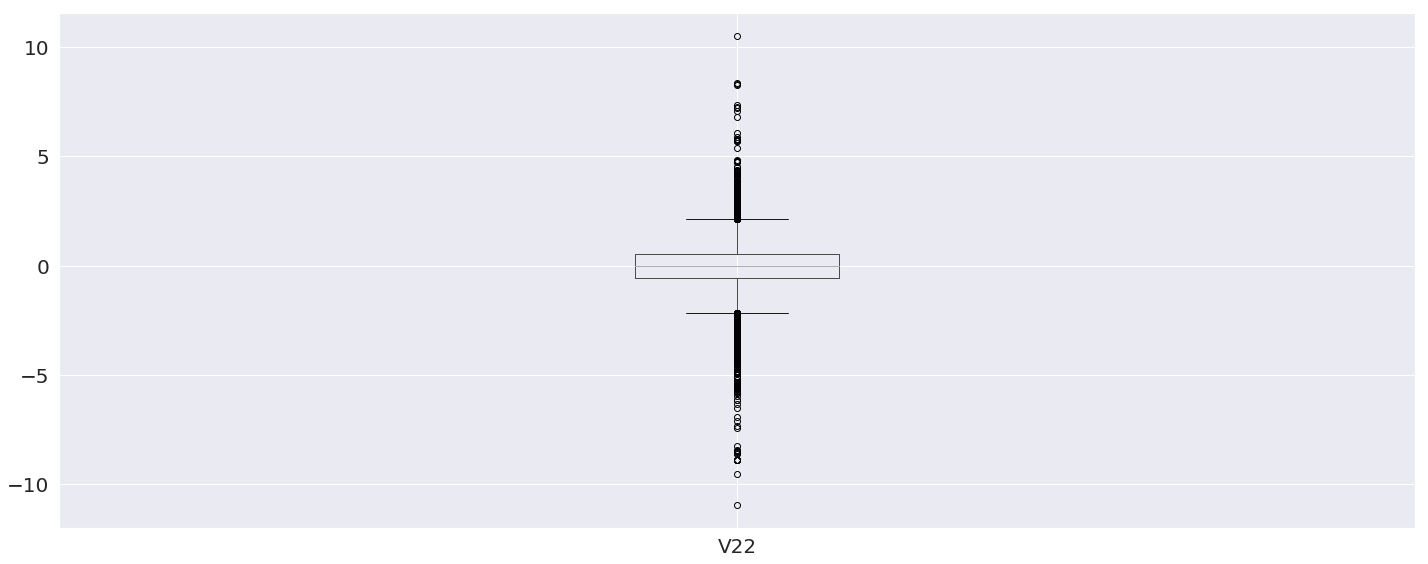

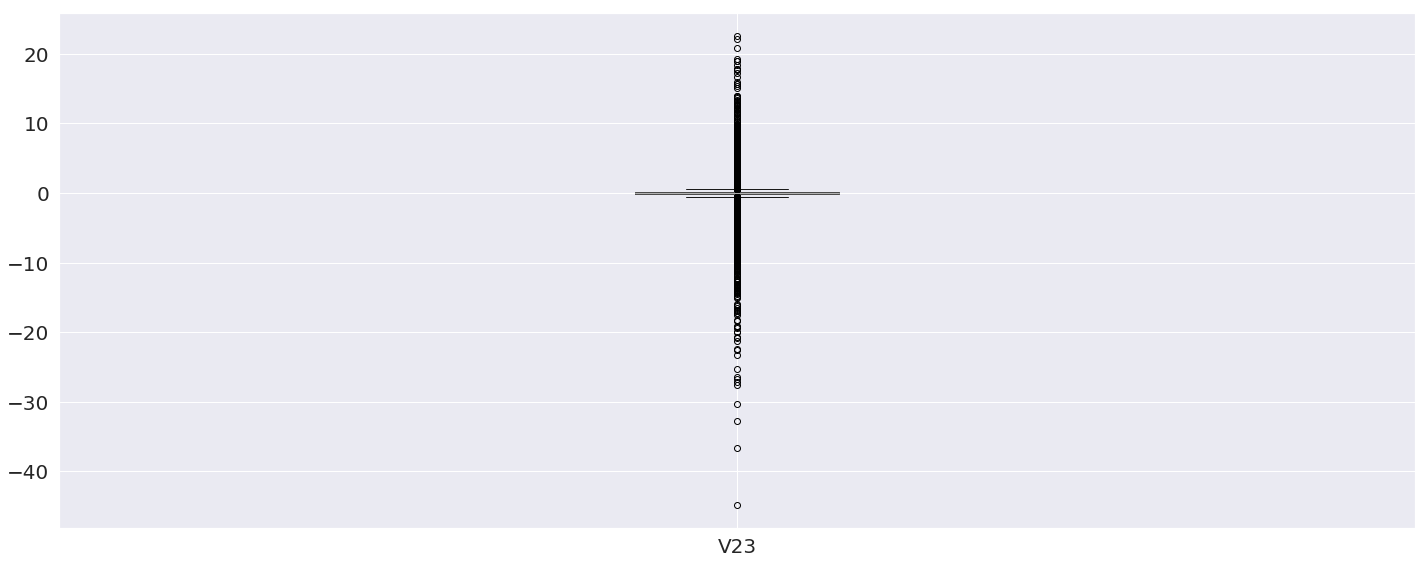

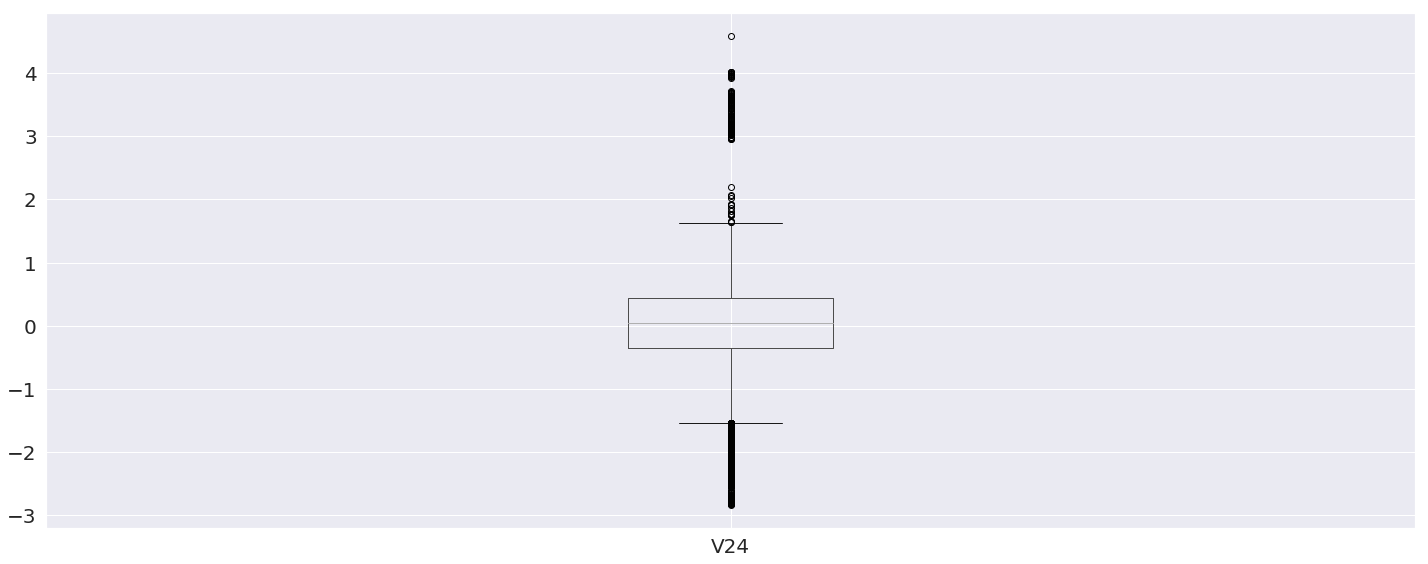

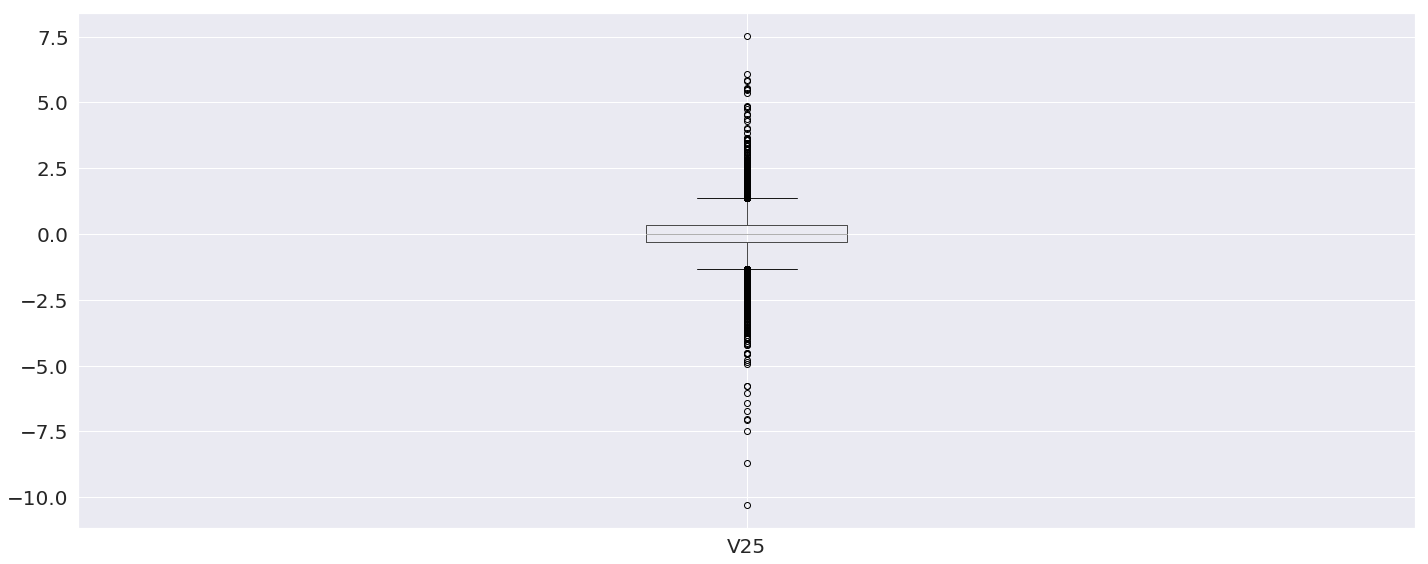

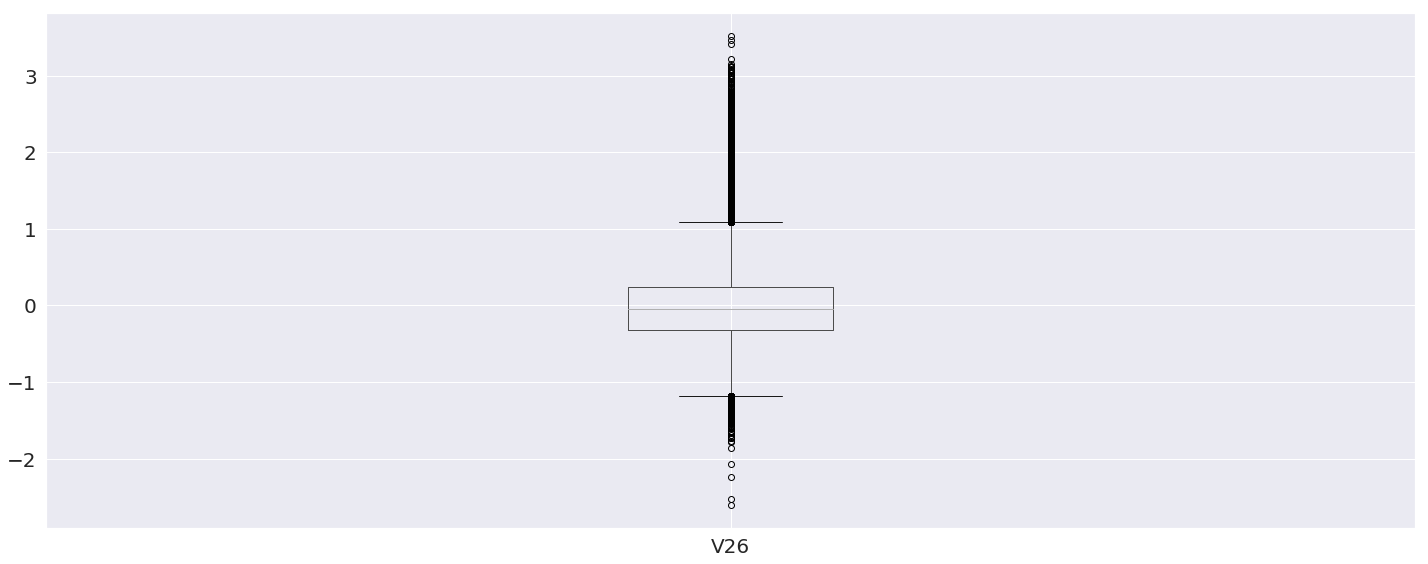

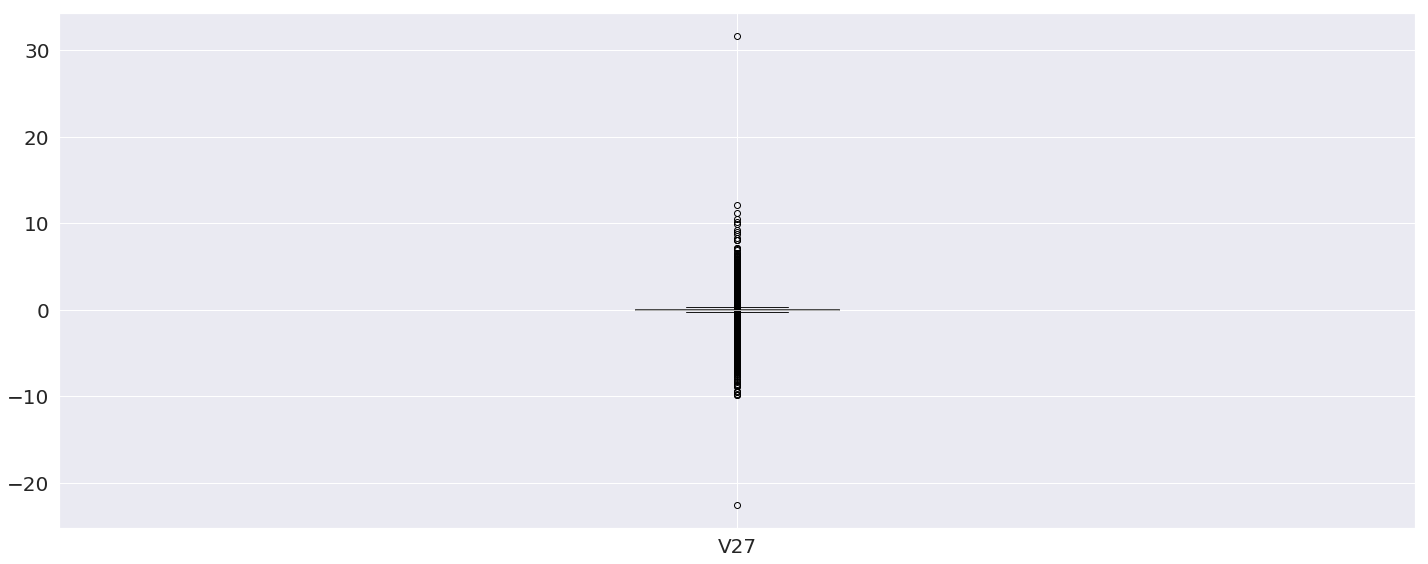

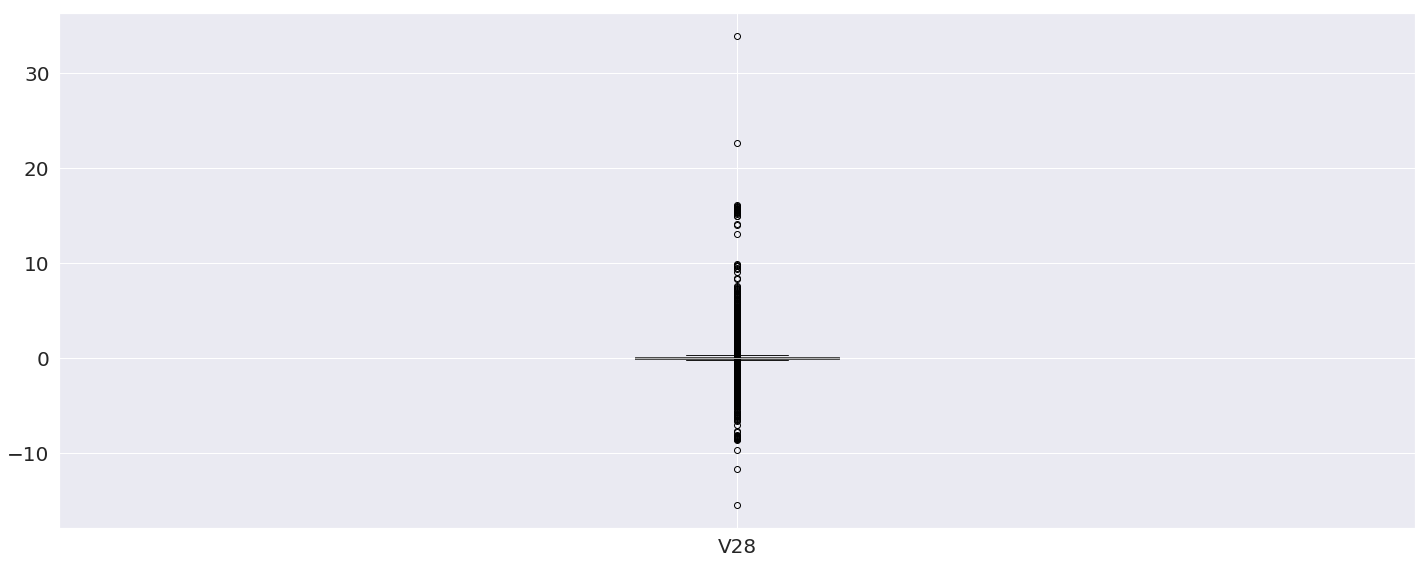

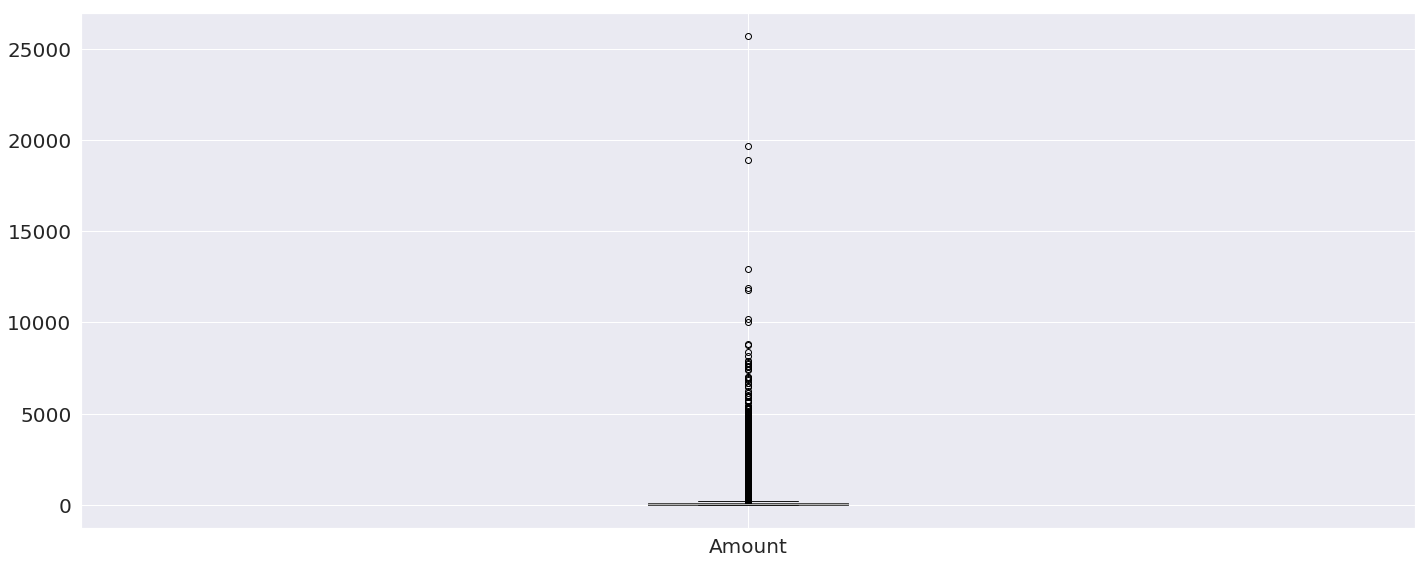

In [8]:
#f = plt.figure(figsize=(20,8))

for col in X.columns:
    plt.figure(figsize=(20,8))
    X[[col]].boxplot(fontsize=20)
    plt.tight_layout()
    plt.show()

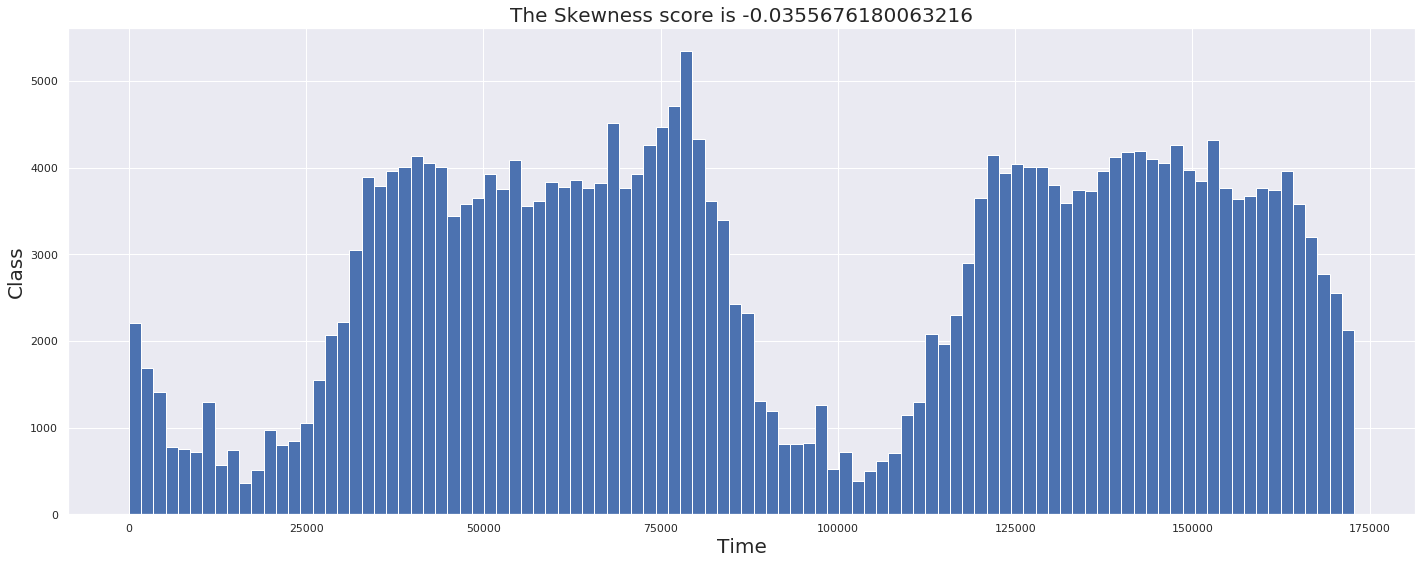

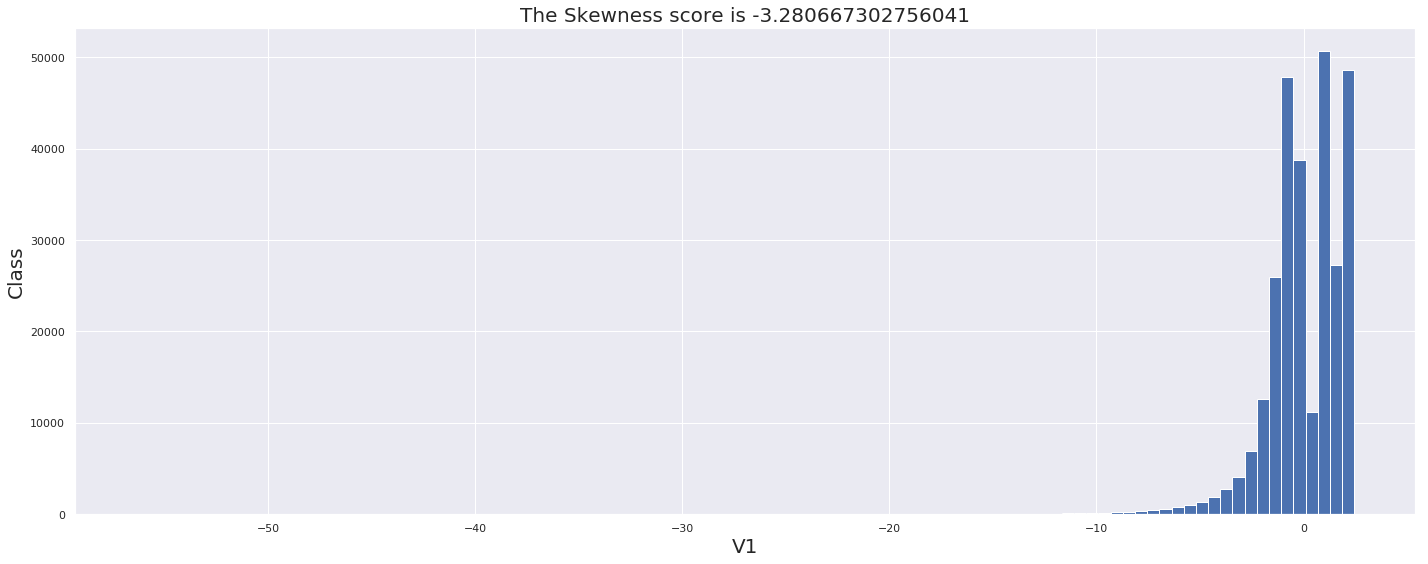

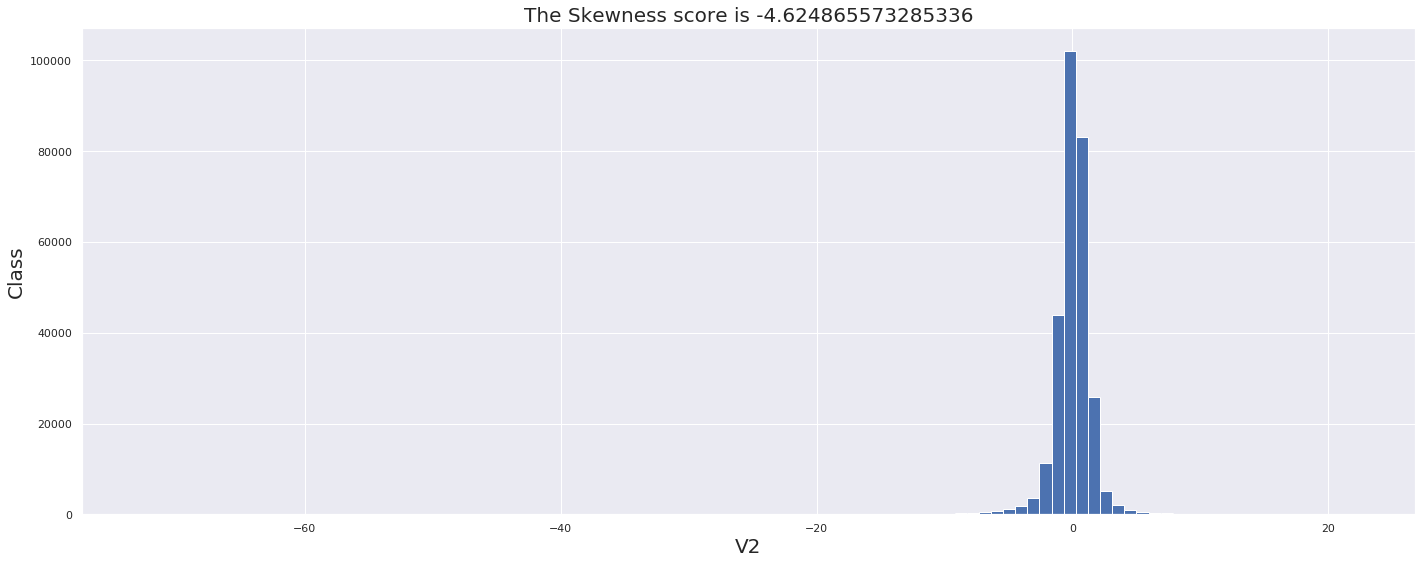

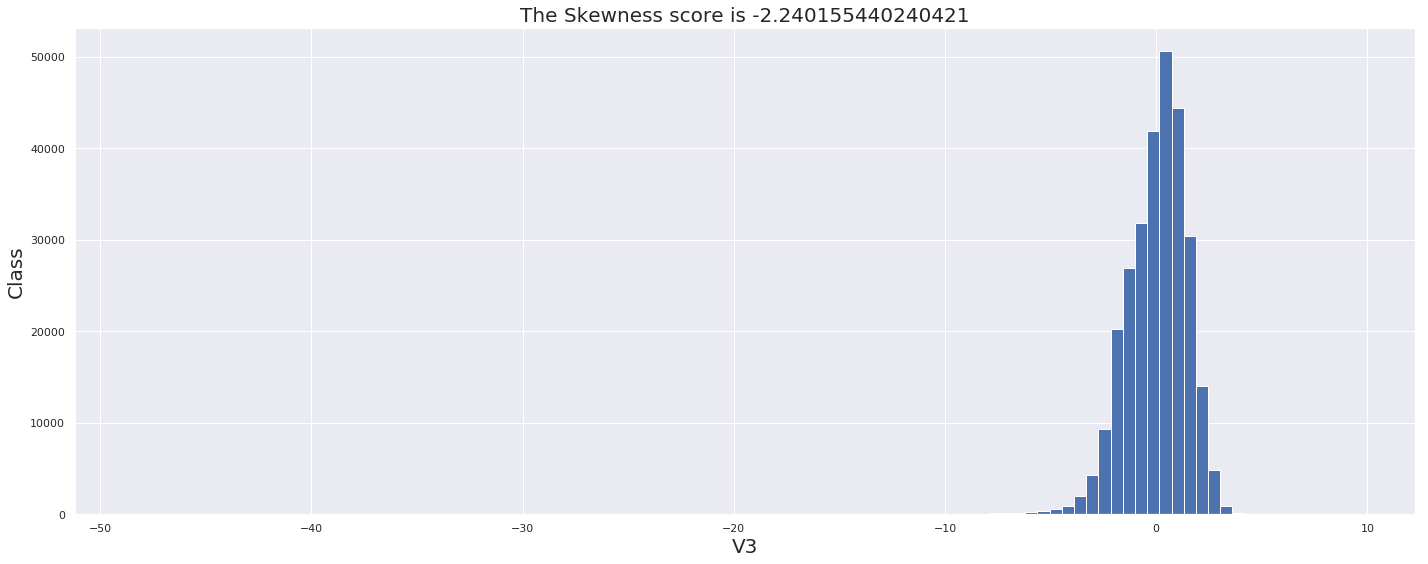

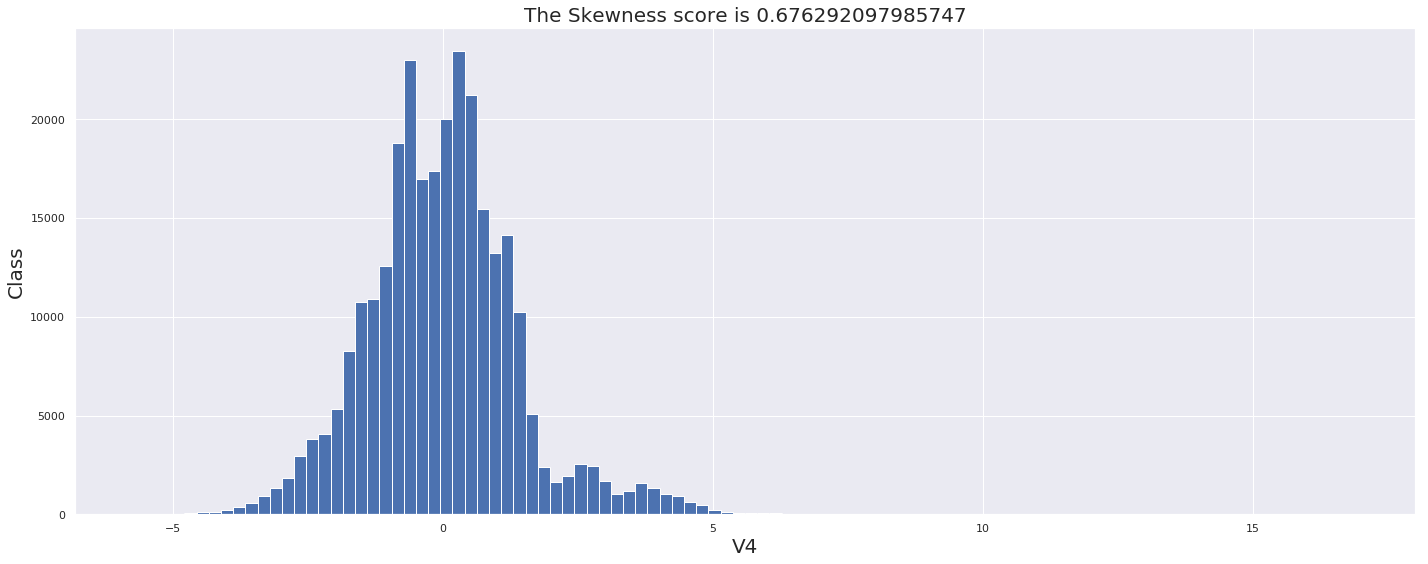

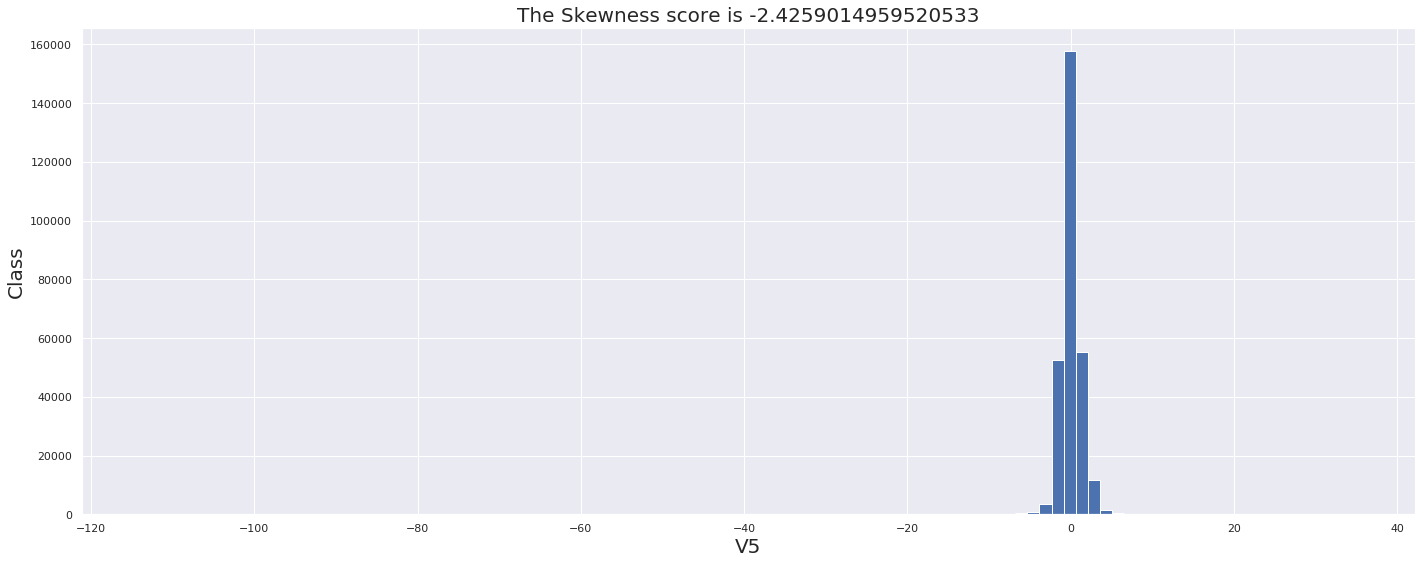

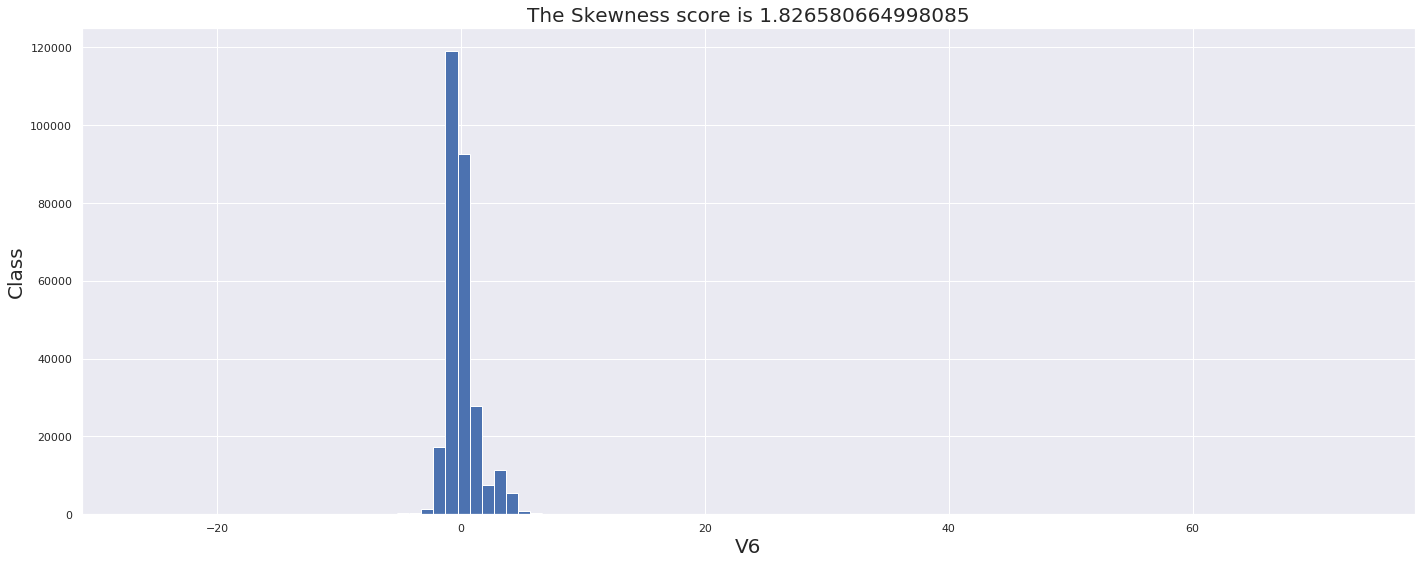

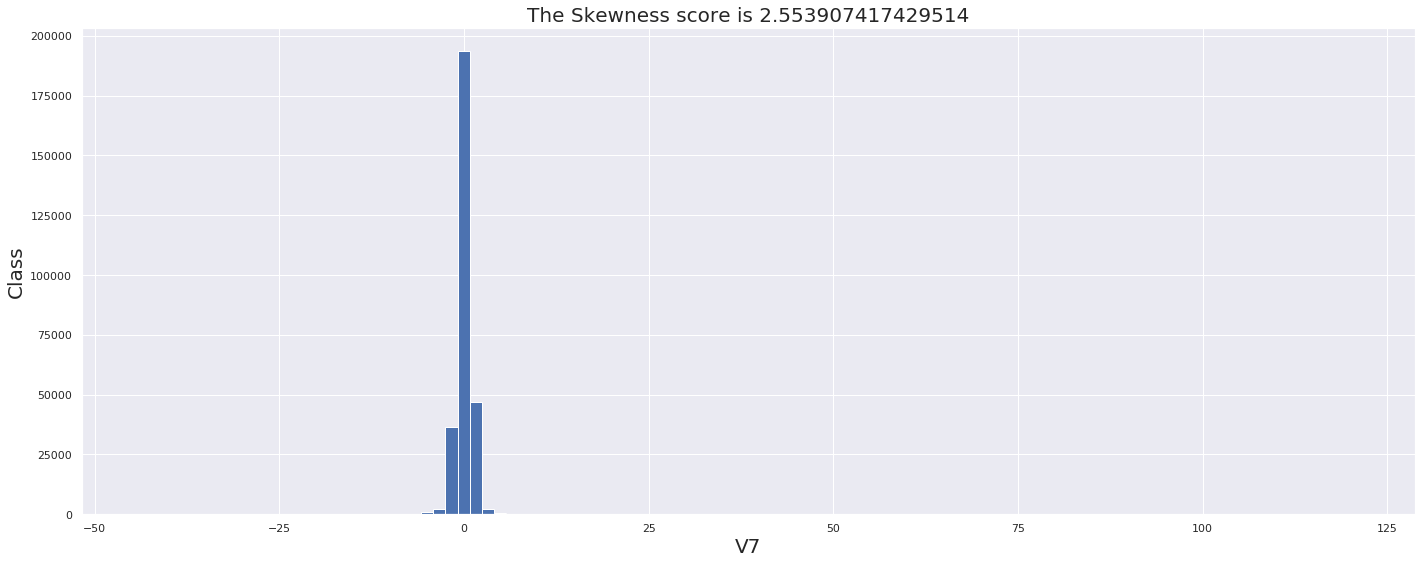

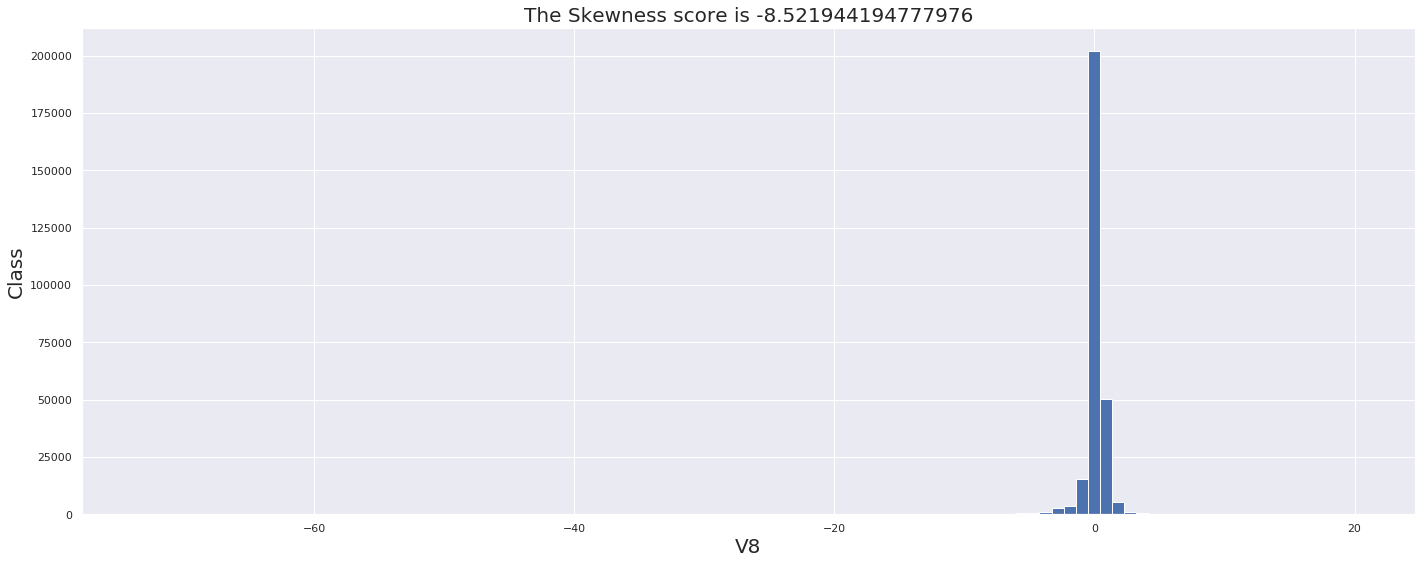

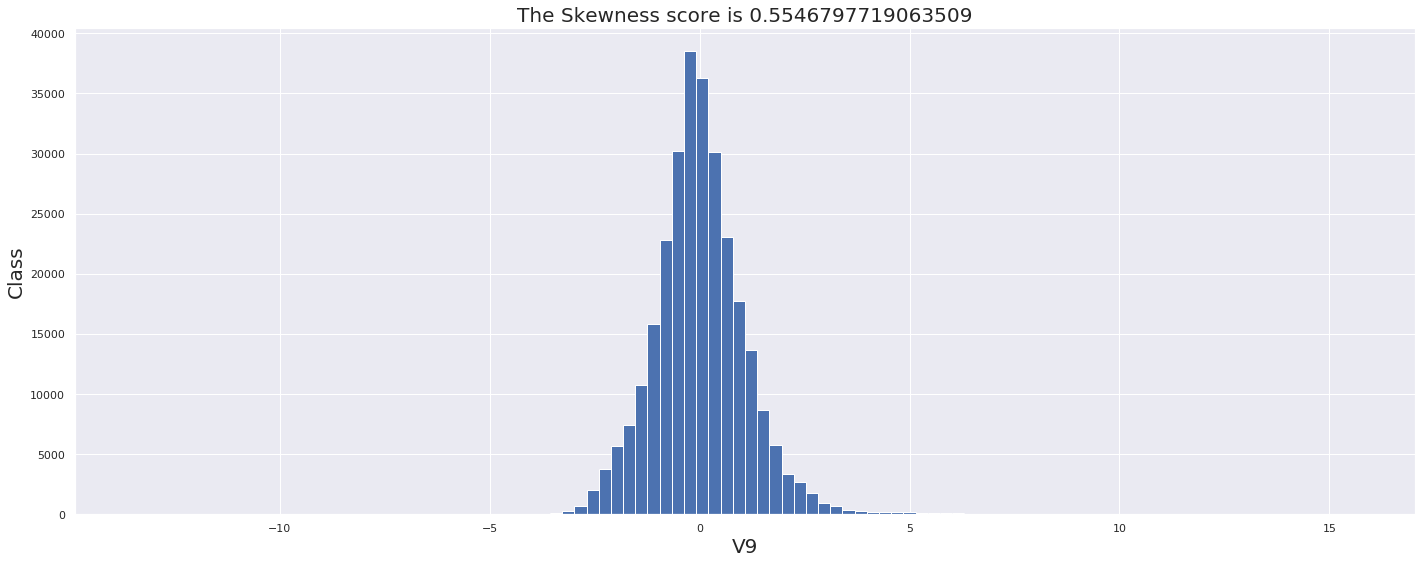

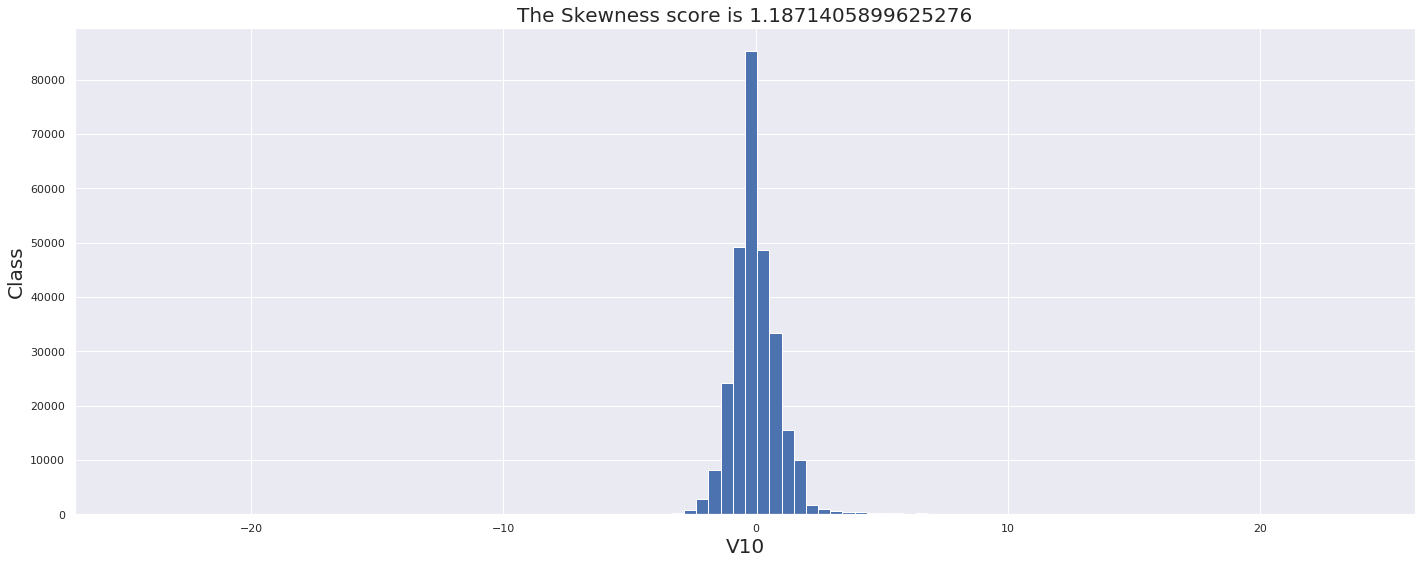

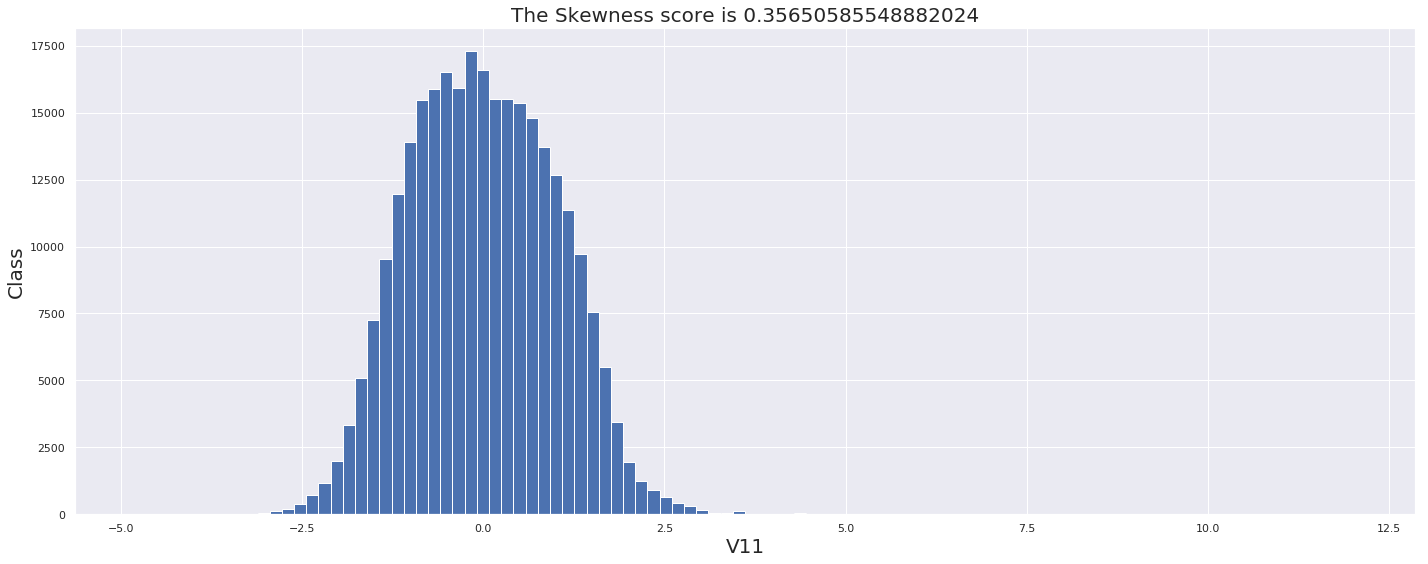

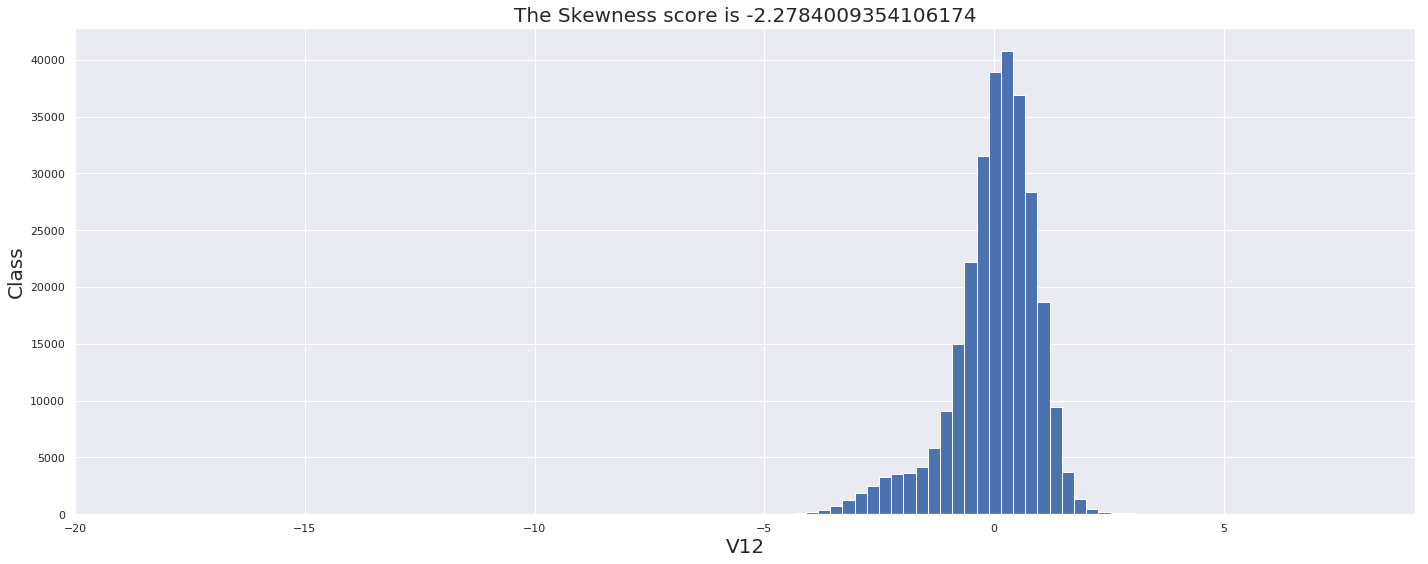

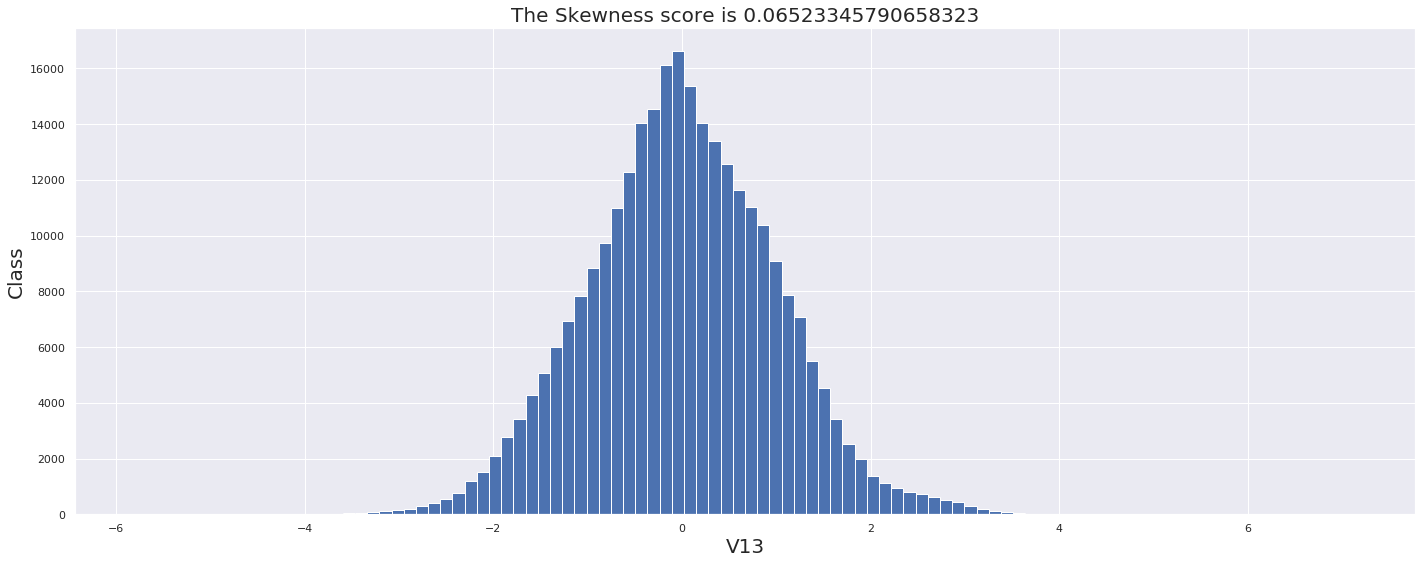

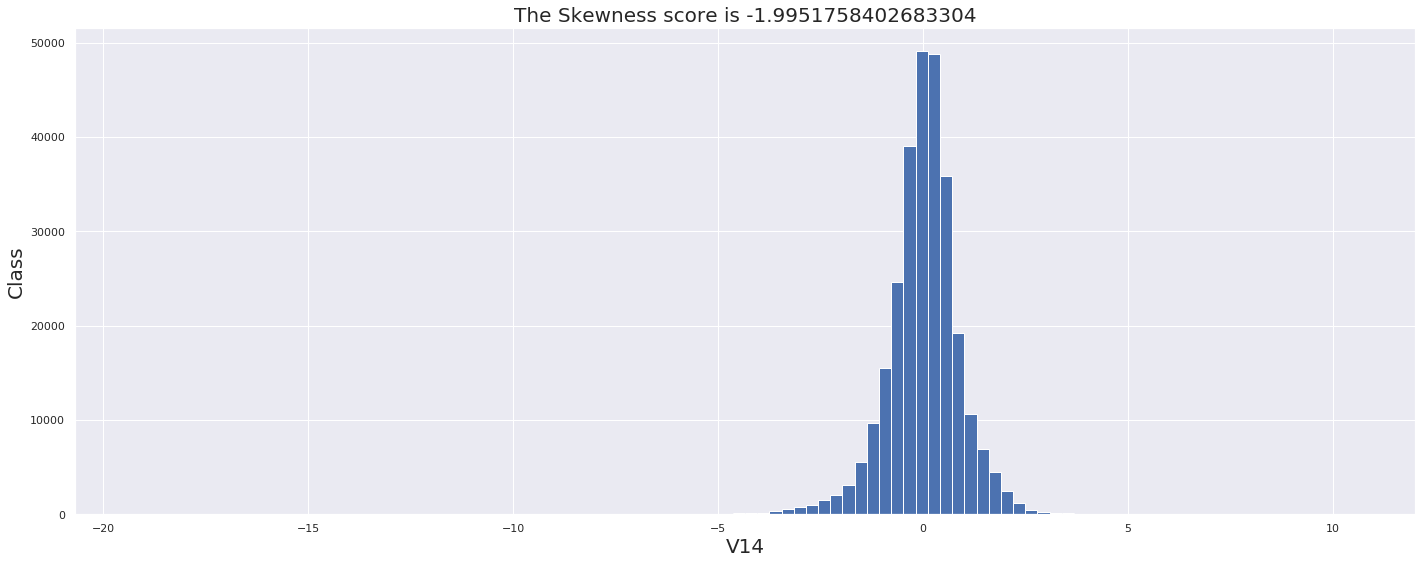

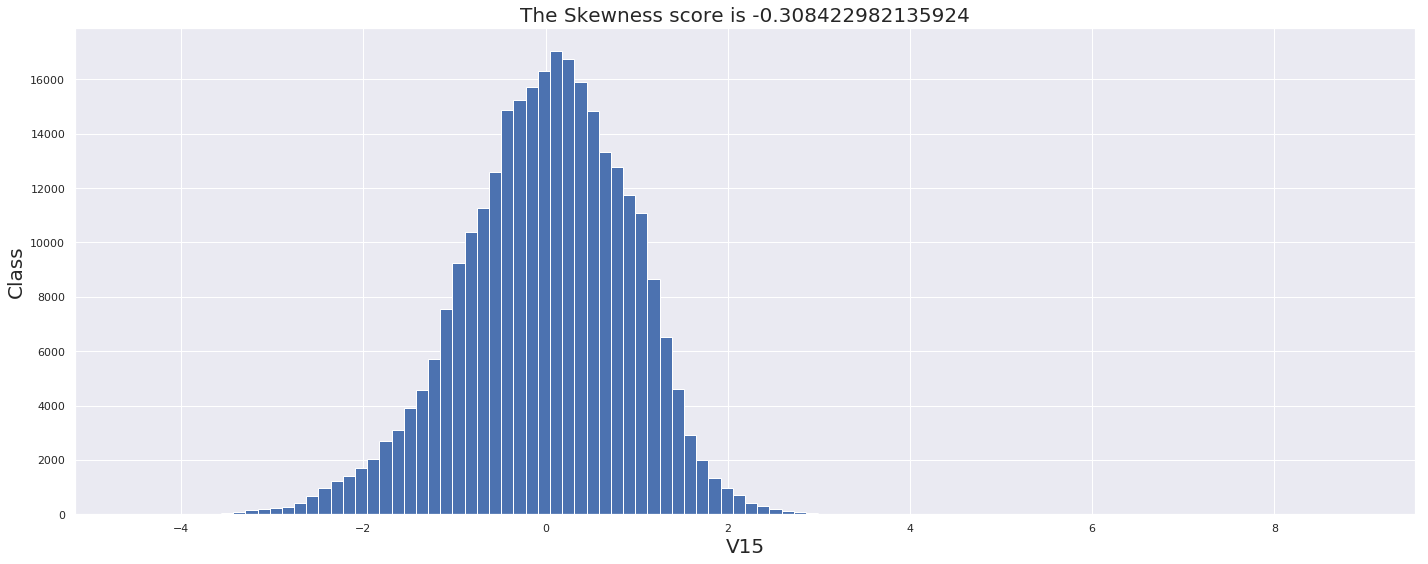

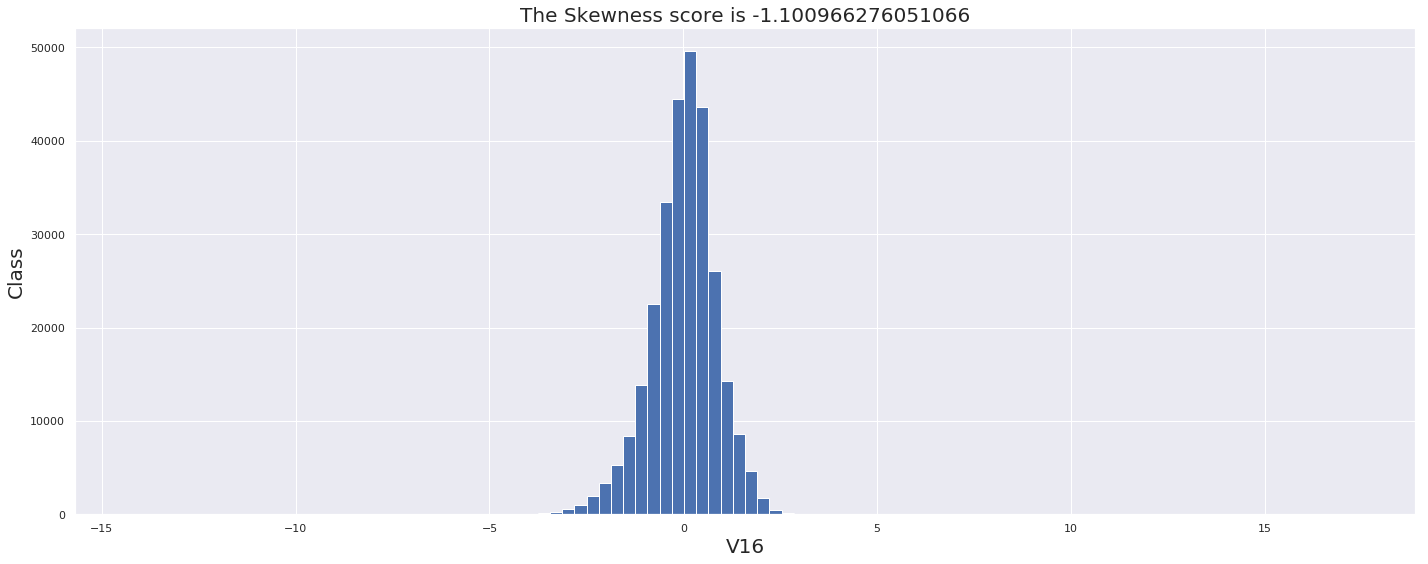

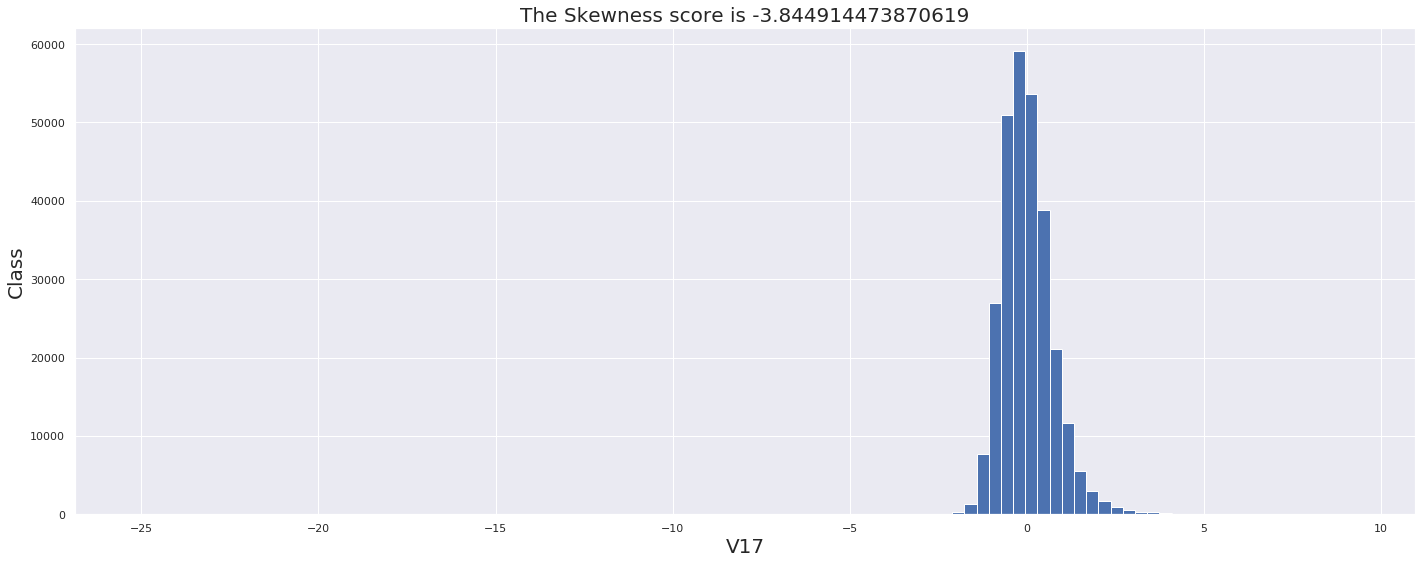

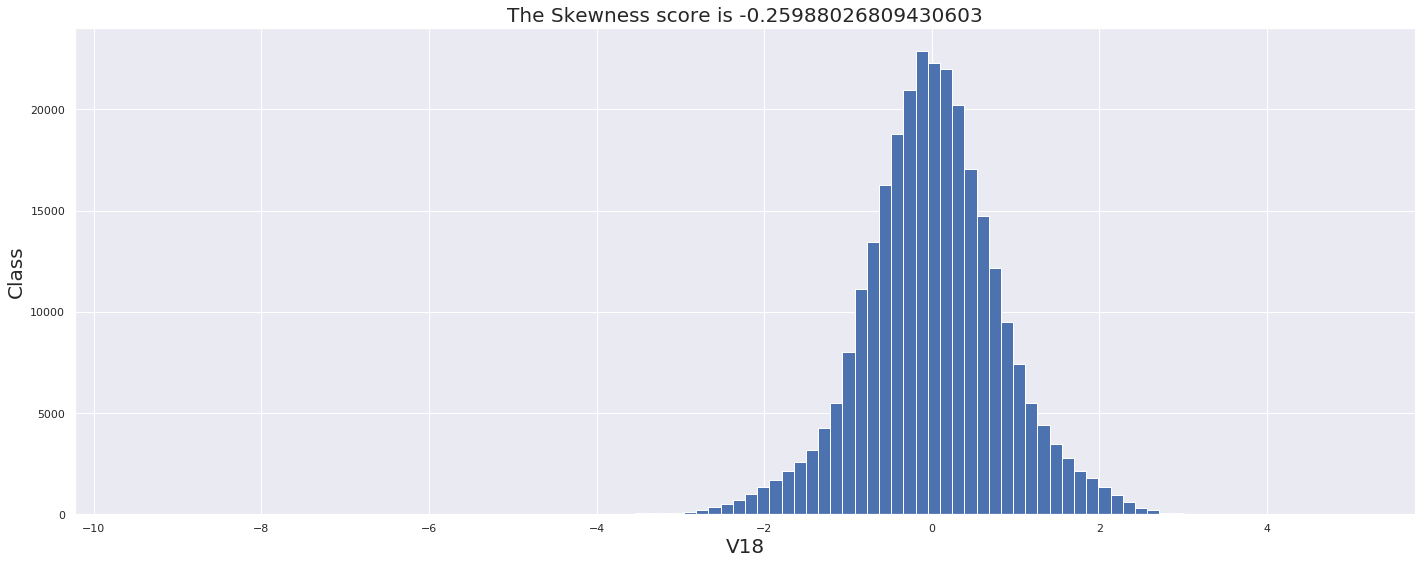

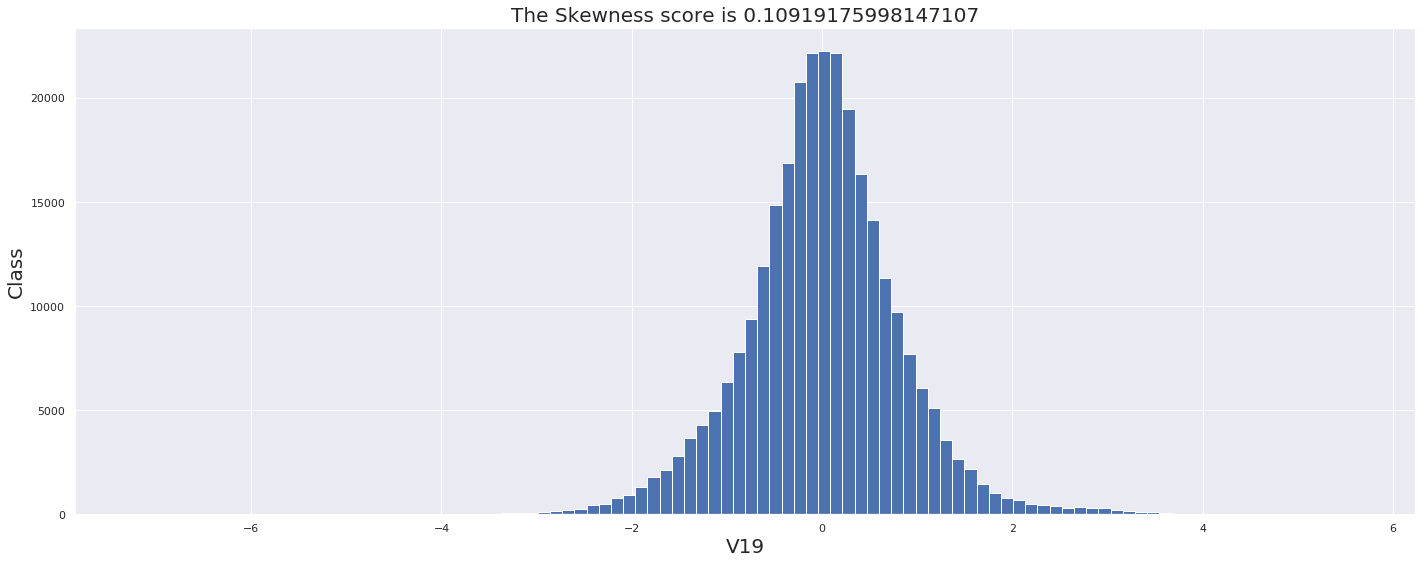

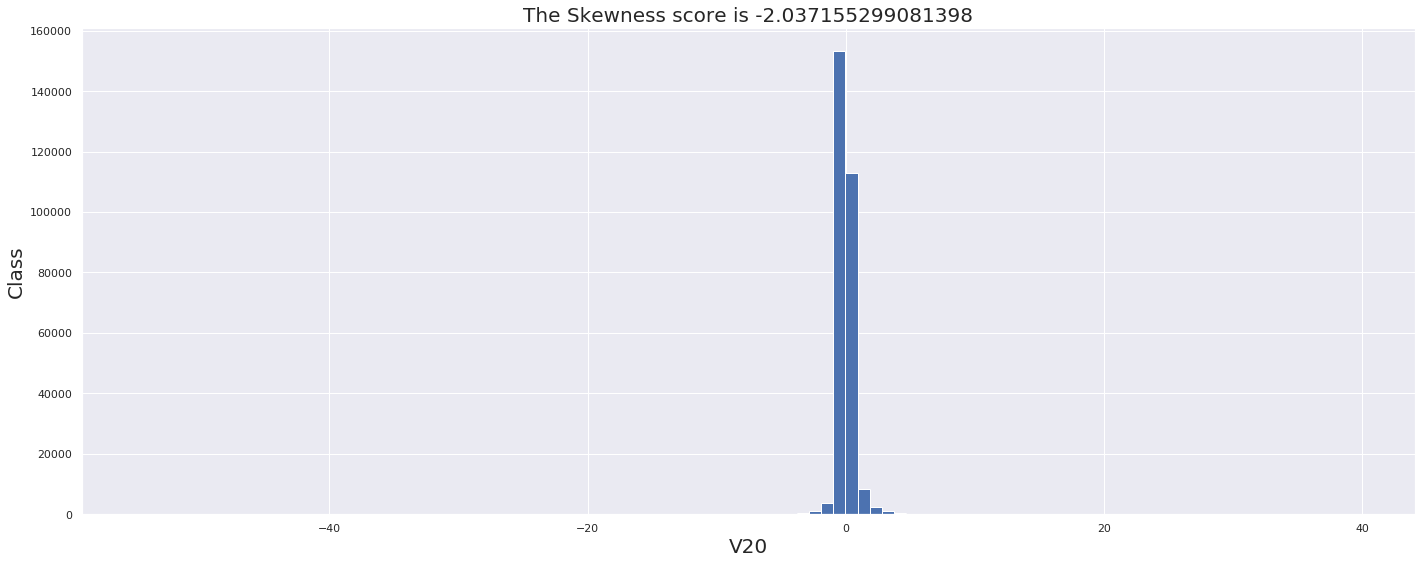

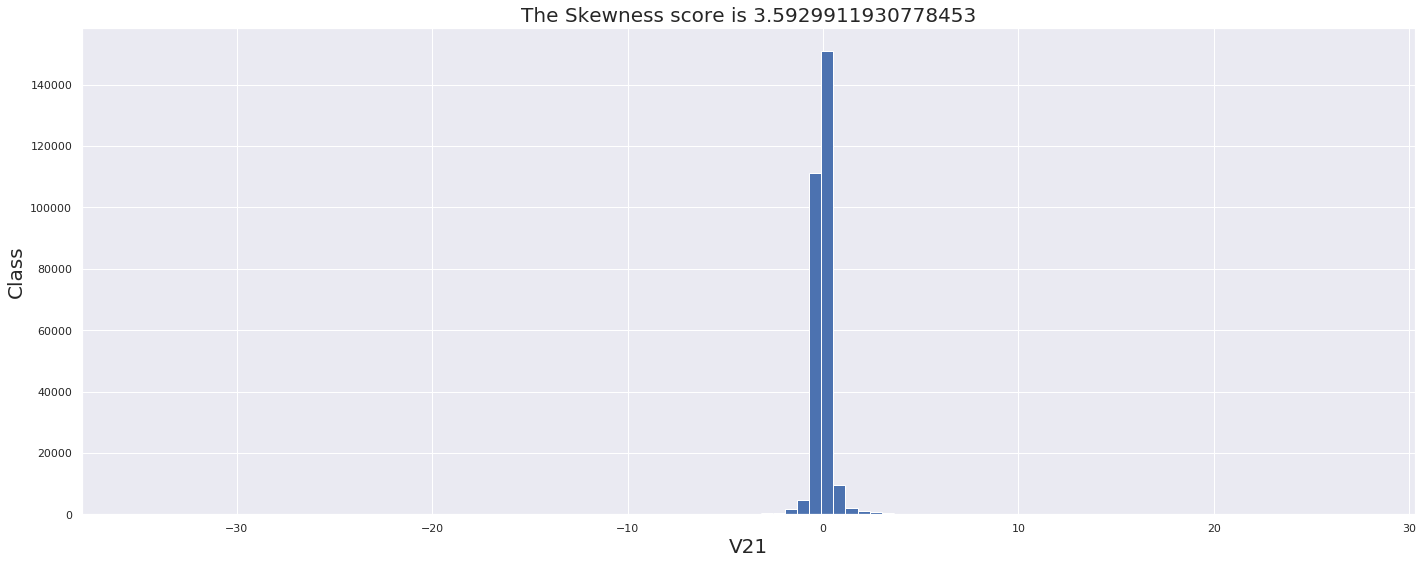

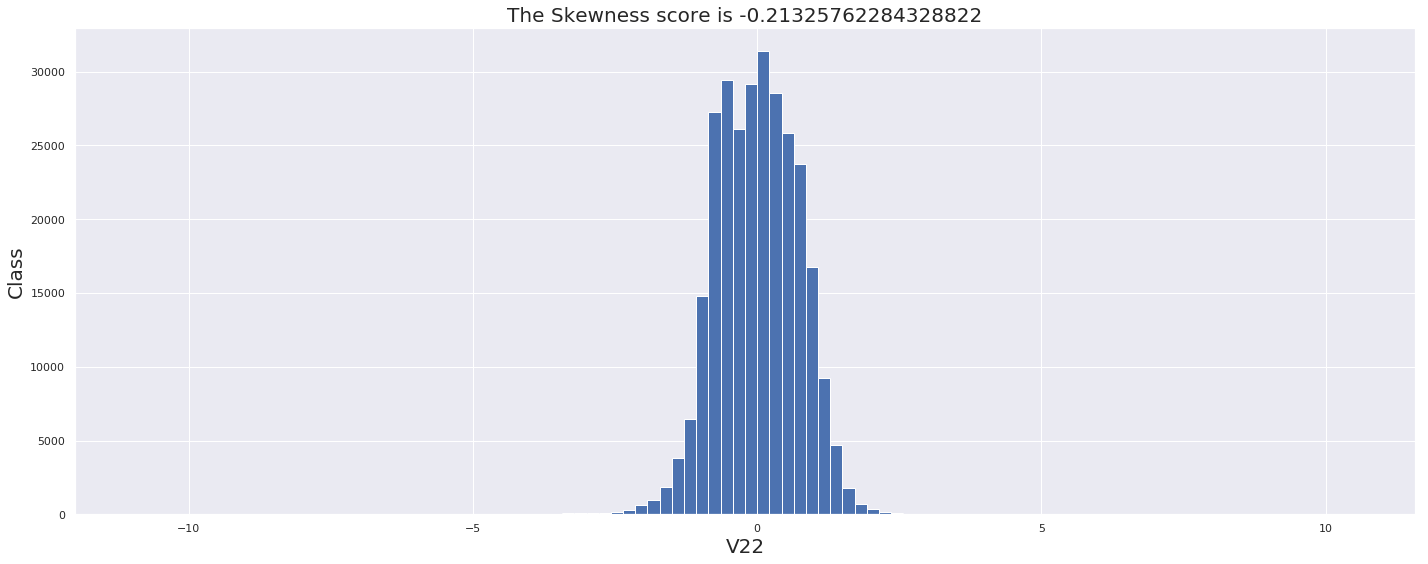

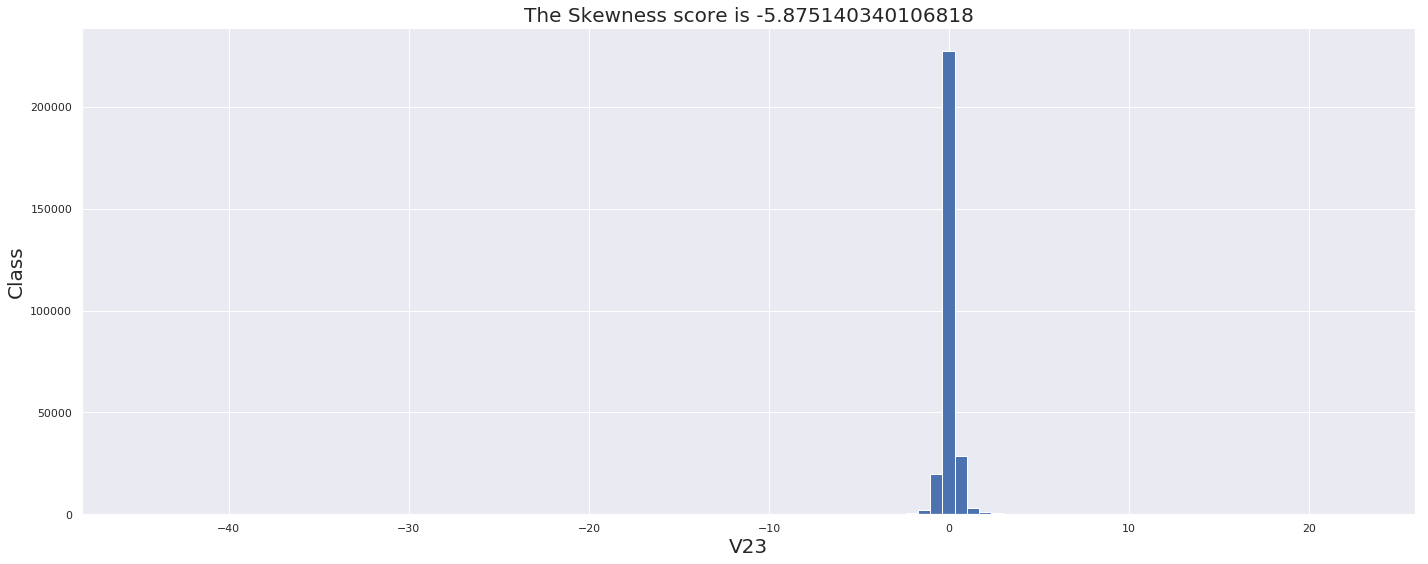

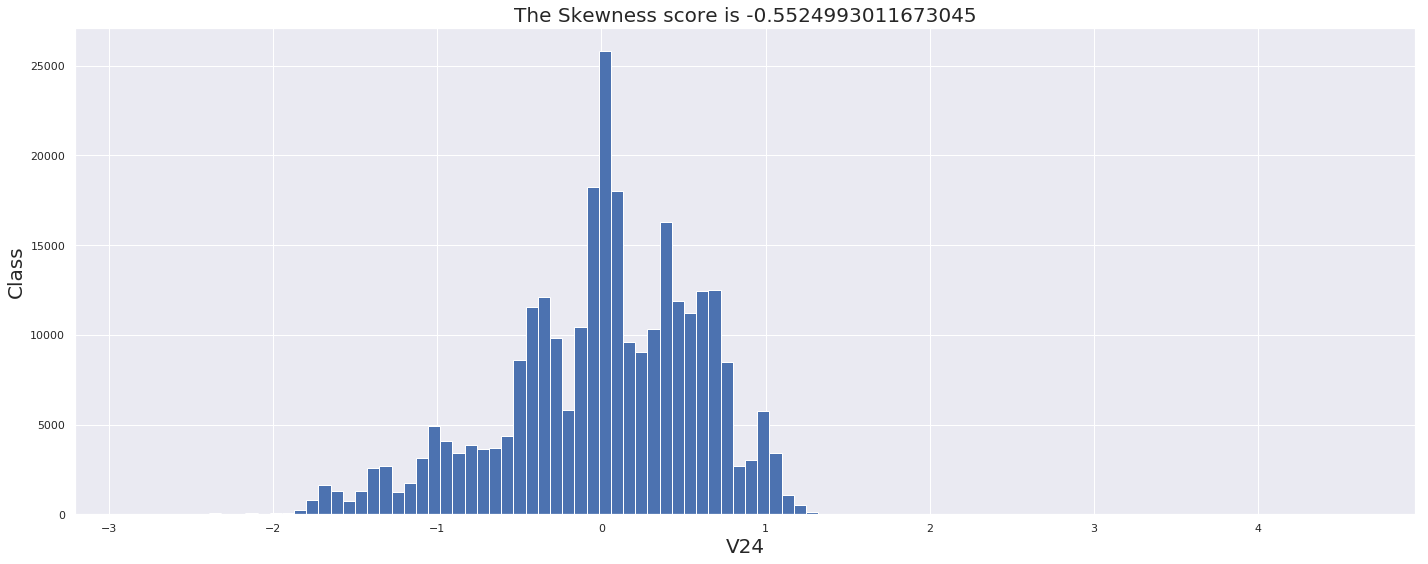

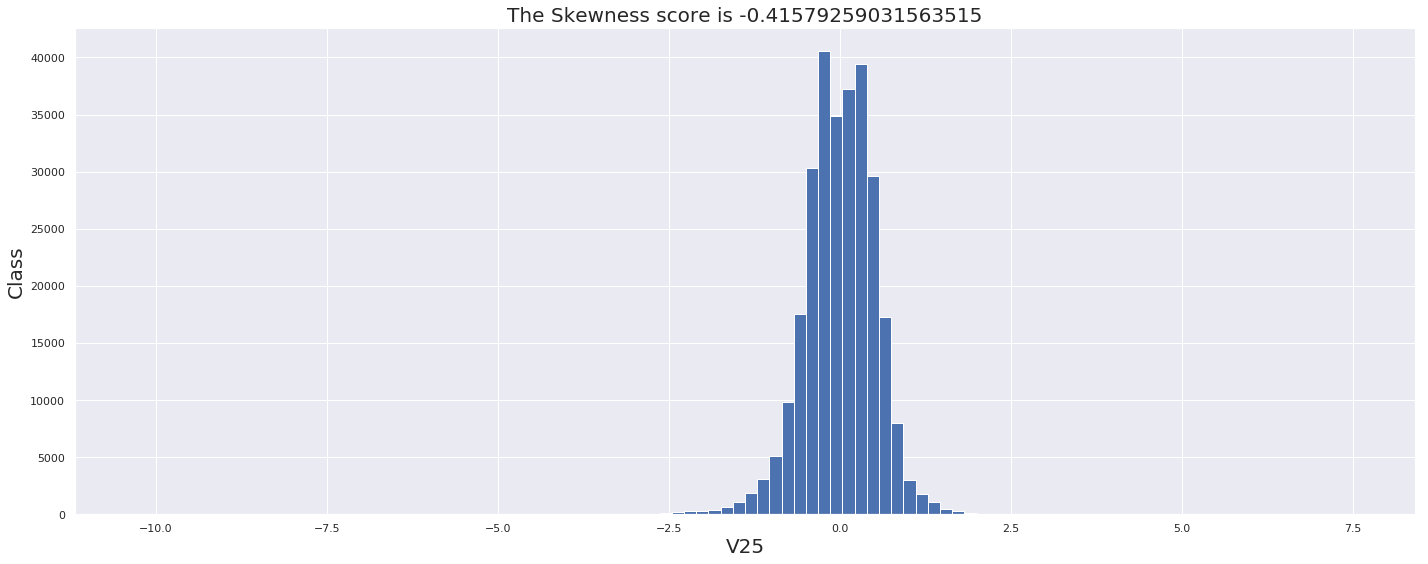

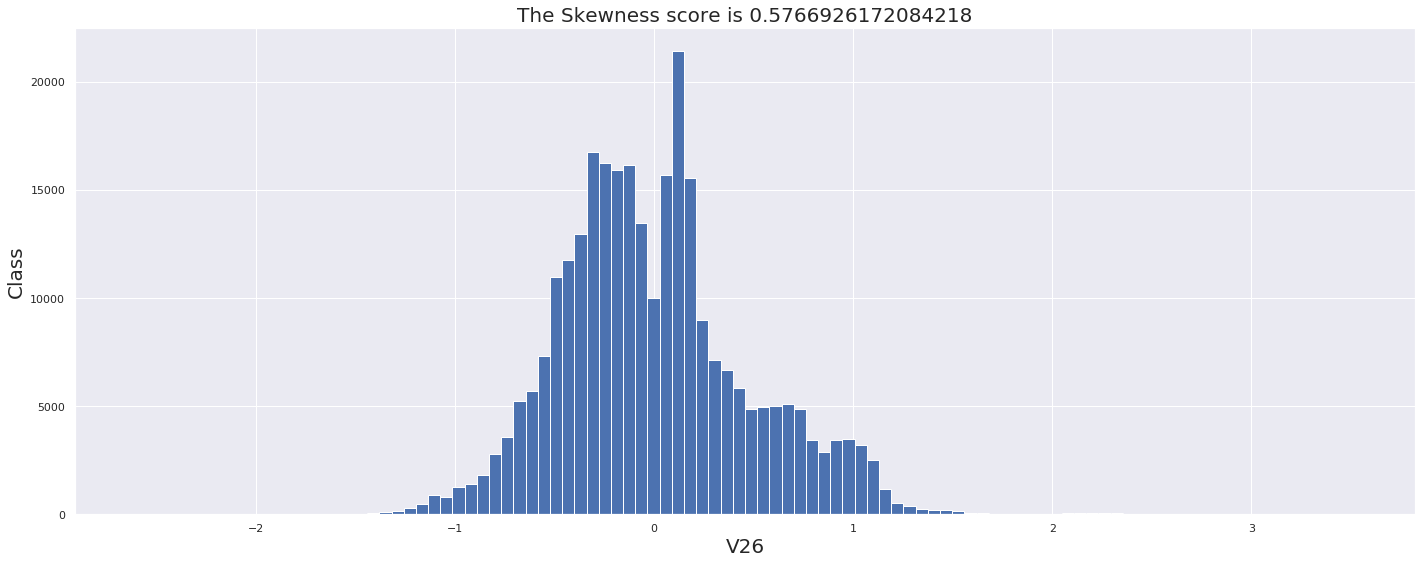

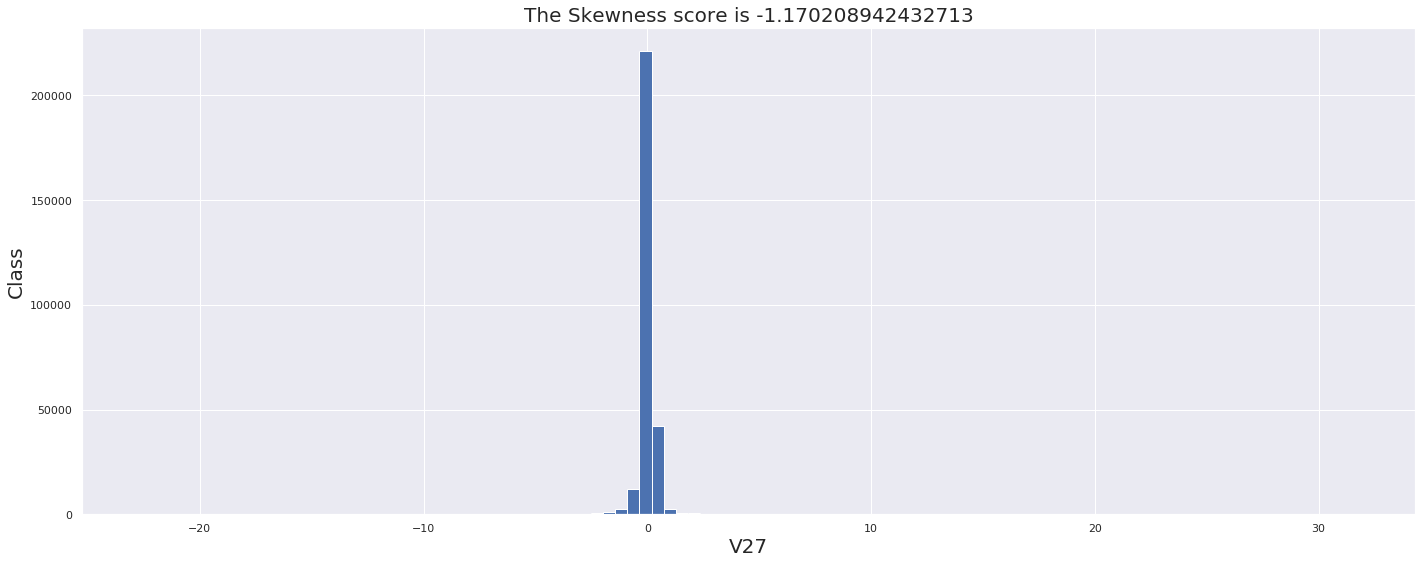

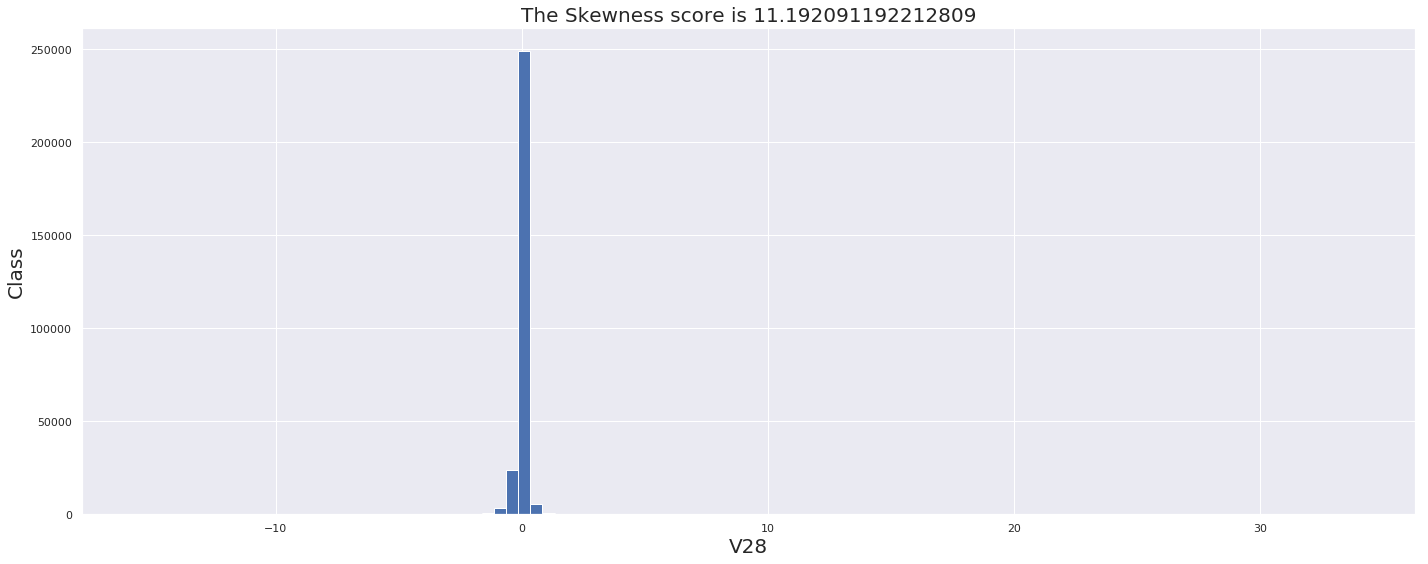

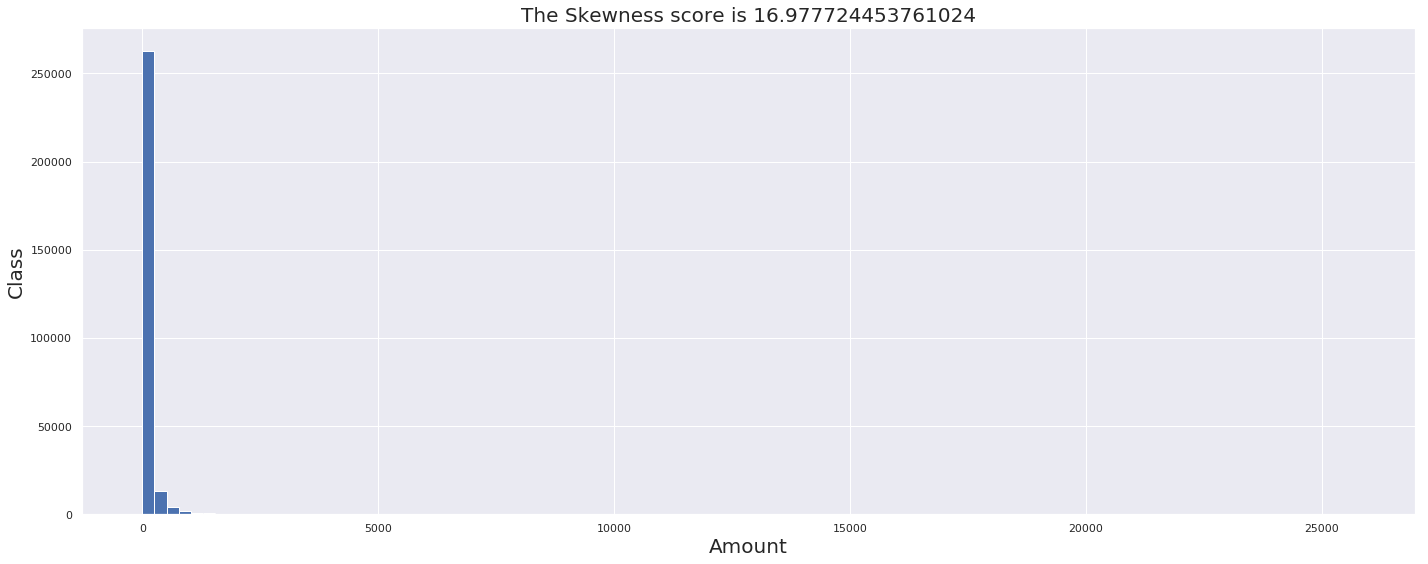

In [51]:
for col in X.columns:
    plt.figure(figsize=(20,8))
    plt.hist(X[col], bins=100)
    plt.title(f'The Skewness score is {X[col].skew()}', fontdict={'fontsize':20})
    plt.xlabel(f'{col}', fontdict={'fontsize':20})
    plt.ylabel('Class', fontdict={'fontsize':20})
    plt.tight_layout()
    plt.show()

In [9]:
data['Amount'] = np.log1p(data['Amount']).skew()

Comment: We checked the distributions for each of the variables in the data. 

We used the log transofrmations of the 'Amount' variable because to reduce the skewness and the impact of extreme values,

**Checking for multicolinearity and inter correlations**

In [10]:
#Checking for inter correlations or Multicollinearity 
def color_map(val):
    color = 'red' if float(val) < -0.4 else 'green' if float(val) > 0.4  else 'black'
    return 'color: %s' % color

corr = X.corr()
df_styled = corr.style.applymap(color_map)
df_styled

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Time,1.000000,0.117396,-0.010593,-0.419618,-0.105260,0.173072,-0.063016,0.084714,-0.036949,-0.008660,0.030617,-0.247689,0.124348,-0.065902,-0.098757,-0.183453,0.011903,-0.073297,0.090438,0.028975,-0.050866,0.044736,0.144059,0.051142,-0.016182,-0.233083,-0.041407,-0.005135,-0.009413,-0.010596
V1,0.117396,1.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,0.000000,0.000000,-0.227709
V2,-0.010593,0.000000,1.000000,0.000000,-0.000000,-0.000000,0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.531409
V3,-0.419618,-0.000000,0.000000,1.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,-0.210880
V4,-0.105260,0.000000,-0.000000,-0.000000,1.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.098732
V5,0.173072,0.000000,-0.000000,-0.000000,-0.000000,1.000000,0.000000,-0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,-0.386356
V6,-0.063016,0.000000,0.000000,0.000000,-0.000000,0.000000,1.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,0.000000,0.215981
V7,0.084714,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,1.000000,-0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.397311
V8,-0.036949,-0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,1.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.103079
V9,-0.008660,0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-0.000000,0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,-0.000000,0.000000,-0.044246


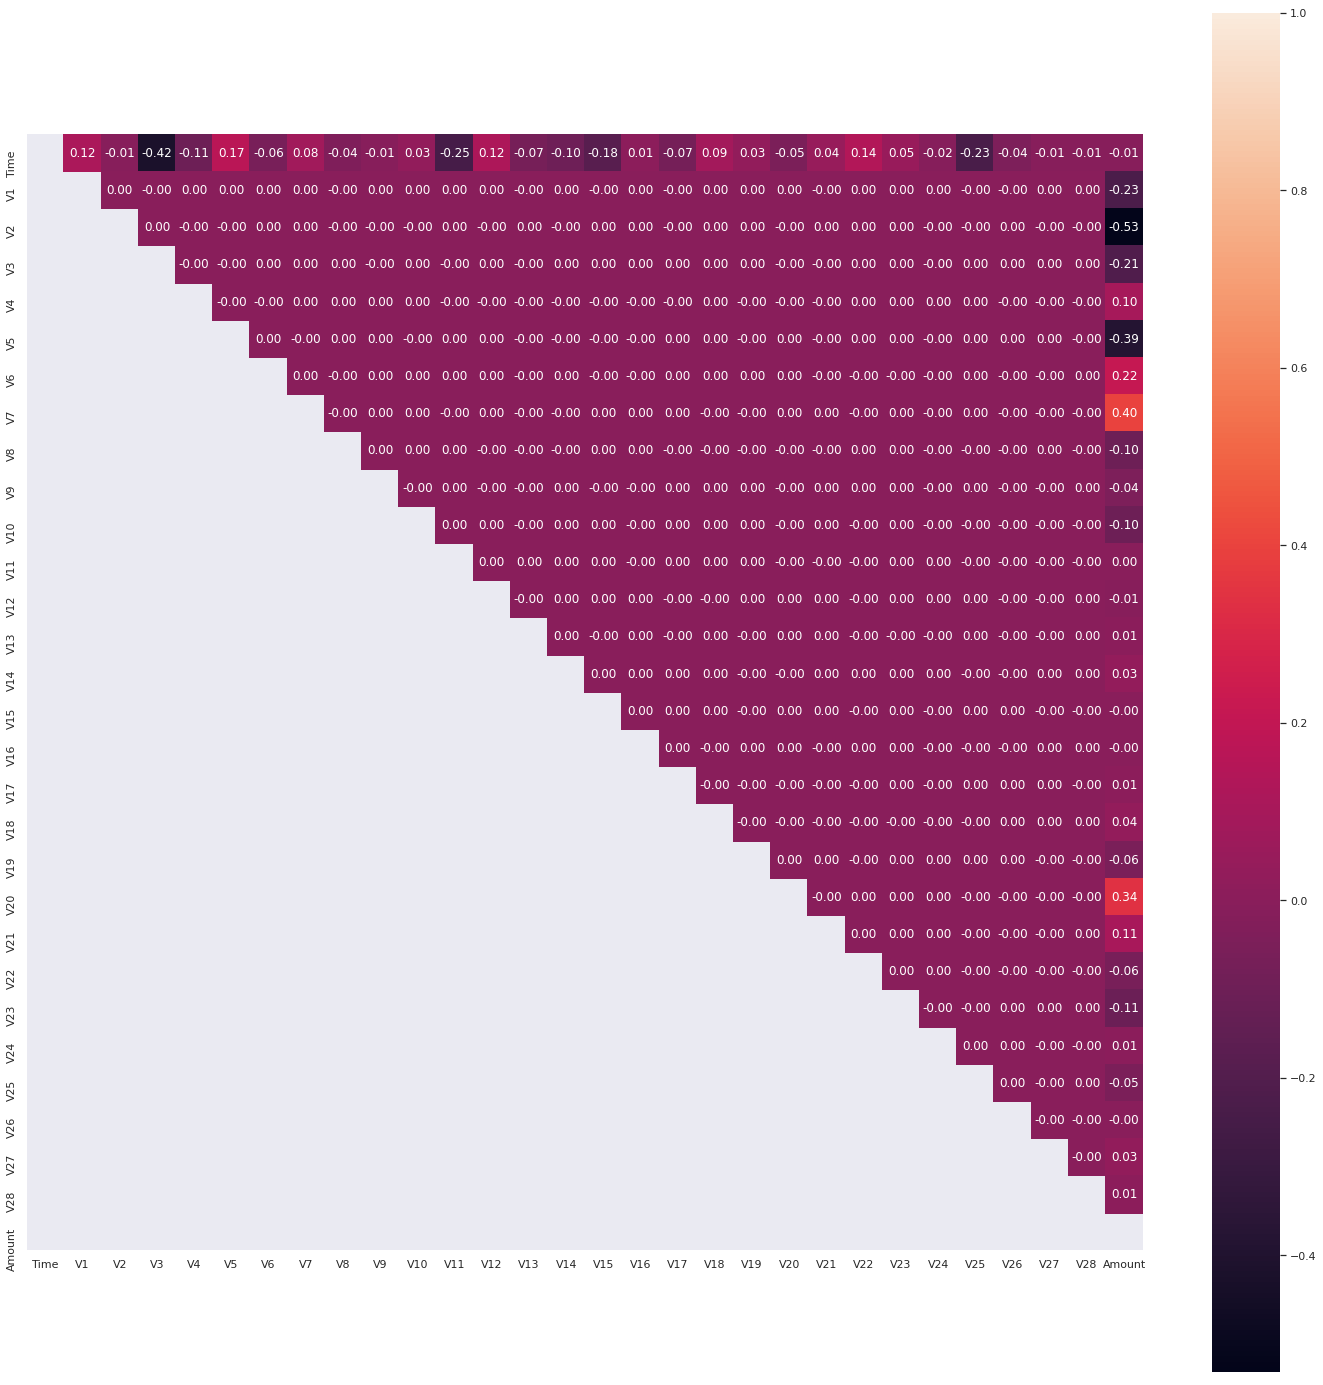

In [11]:
f = plt.figure(figsize=(25,25))
mask = np.tril(np.ones_like(corr, dtype=np.bool))
ax = sns.heatmap(corr, annot=True, fmt=".2f", mask = mask, square = True)

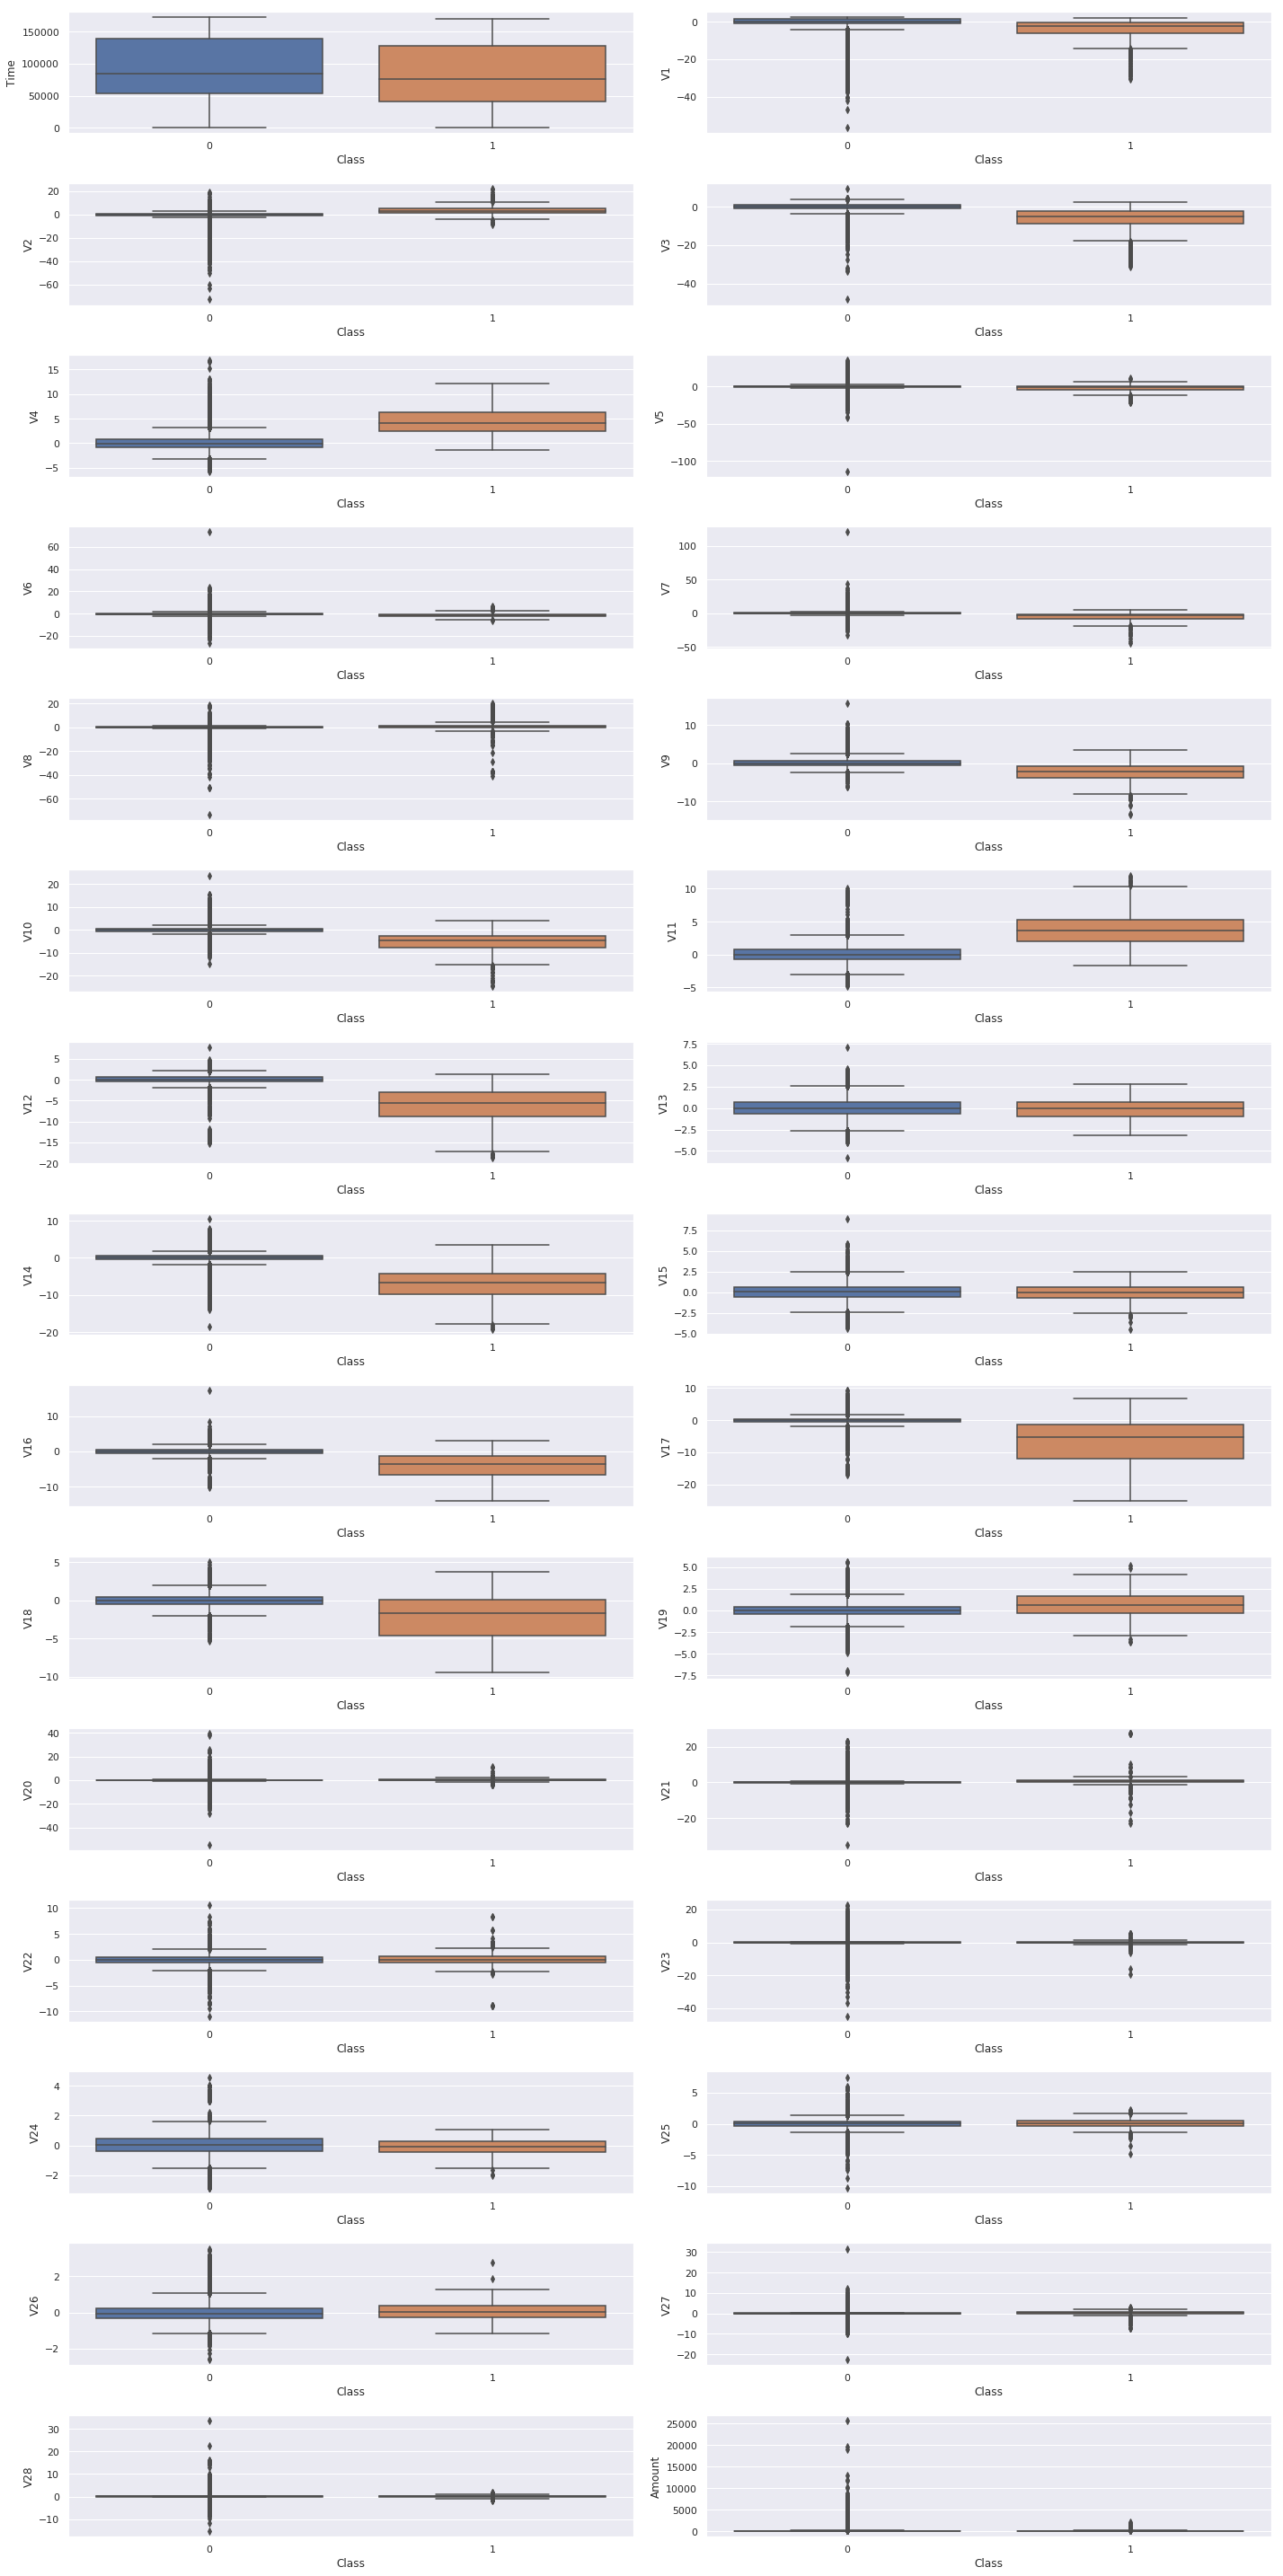

In [12]:
#Plotting the categorical variables against the predicted feature.
f = plt.figure(figsize=(20,40))

NROWS = 15
NCOLS =2
for i,col in enumerate(X.columns):
    plt.subplot(NROWS,NCOLS,i+1)
    #plt.title("SalePrice vs {}".format(col))
    sns.boxplot(y, X[col])
    
plt.tight_layout()
plt.show()

### Preprocessing

**Splitting to train and test and validation**

In [71]:
from sklearn.model_selection import train_test_split

X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.2, stratify=y)
X_validation, X_test, y_validation, y_test = train_test_split(X_validation, y_validation, test_size=0.5, stratify=y_validation)

validation

In [72]:
print('X_train shape', X_train.shape)
print('X_validation shape', X_validation.shape)
print('X_test shape', X_test.shape)
print('y_train shape', y_train.shape)
print('y_validation shape', X_validation.shape)
print('X_test shape', X_test.shape)

X_train shape (227845, 30)
X_validation shape (28481, 30)
X_test shape (28481, 30)
y_train shape (227845,)
y_validation shape (28481, 30)
X_test shape (28481, 30)


**standartize the data**

In [73]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train_sc = sc.fit_transform(X_train)
X_valid_sc = sc.transform(X_validation)
X_test_sc = sc.transform(X_test)

X_train_sc = X_train_sc[((X_train_sc <3.5) & (X_train_sc > -3.5)).all(axis=1)]
X_valid_sc = X_valid_sc[((X_valid_sc <3.5) & (X_valid_sc > -3.5)).all(axis=1)]
X_test_sc = X_test_sc[((X_test_sc <3.5) & (X_test_sc > -3.5)).all(axis=1)]

### Modeling

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, f1_score, precision_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve


In [27]:
def find_best_threshold(thresholds, fpr, tpr):
    """
    find the best threshold from the roc curve. by finding the threshold for the point which is closest to (fpr=0,tpr=1)
    """
    fpr_tpr = pd.DataFrame({'thresholds': thresholds, 'fpr': fpr, 'tpr': tpr})
    fpr_tpr['dist'] = (fpr_tpr['fpr'])**2 + (fpr_tpr['tpr']-1)**2
    return fpr_tpr.loc[fpr_tpr.dist.idxmin(), 'thresholds']


def get_model_results(model, train, test, y_train, y_test):
    """Plotting the ROC curves"""
    probabilities = model.predict_proba(test)[:,1]
    print(probabilities)
    fpr, tpr, thresholds = roc_curve(y_test, probabilities)
    threshold = find_best_threshold(thresholds, fpr, tpr)
    predictions = probabilities>threshold
    plt.figure()
    plt.plot(fpr, tpr, label='test')
    roc_auc = roc_auc_score(y_test, probabilities)
    print(roc_auc)
    probabilities = model.predict_proba(train)[:,1]
    fpr, tpr, thresholds = roc_curve(y_train, probabilities)
    plt.plot(fpr, tpr, label='train')
    plt.plot([0, 1], [0, 1], 'r--', label='random guess')
    plt.title("area under the ROC curve = {:.3f}".format(roc_auc), fontsize=18);
    plt.xlabel('1-specifity')
    plt.ylabel('sensitivity')
    plt.legend()

Logistic Regression

In [19]:
lr_model = LogisticRegression()

#fitting
lr_model.fit(X_train_sc, y_train)

#predict
predicts = lr_model.predict(X_valid_sc)

In [20]:
print('confusion matrix: \n', confusion_matrix(y_validation, predicts))
print('report: \n', classification_report(y_validation, predicts))

confusion matrix: 
 [[28428     4]
 [   22    27]]
report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     28432
           1       0.87      0.55      0.67        49

    accuracy                           1.00     28481
   macro avg       0.94      0.78      0.84     28481
weighted avg       1.00      1.00      1.00     28481



Random Forest

In [23]:
rf_model = RandomForestClassifier(n_estimators=200)

#fitting
rf_model.fit(X_train_sc, y_train)

#predict
predicts = rf_model.predict(X_valid_sc)

In [24]:
print('confusion matrix: \n', confusion_matrix(y_validation, predicts))
print('report: \n', classification_report(y_validation, predicts))

confusion matrix: 
 [[28430     2]
 [    8    41]]
report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     28432
           1       0.95      0.84      0.89        49

    accuracy                           1.00     28481
   macro avg       0.98      0.92      0.95     28481
weighted avg       1.00      1.00      1.00     28481



[[28430     2]
 [    8    41]]


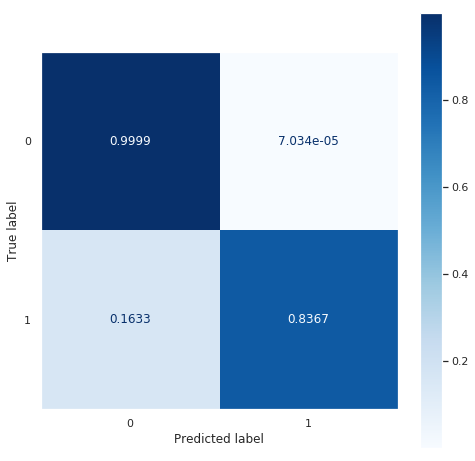

In [26]:
print(confusion_matrix(y_validation, predicts))
f = plt.figure(figsize=(8,8))
plt.grid(False)
plot_confusion_matrix(rf_model, X_valid_sc, y_validation,
                                 cmap=plt.cm.Blues, ax=plt.gca(), values_format='.4g', normalize='true')
plt.show()

[0. 0. 0. ... 0. 0. 0.]
0.9574943581822148


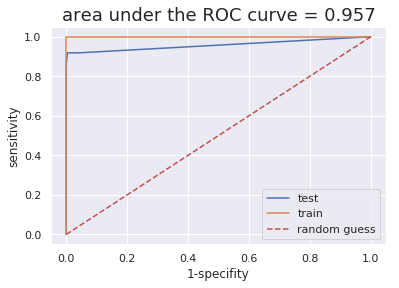

In [28]:
get_model_results(rf_model, X_train_sc, X_valid_sc, y_train, y_validation)

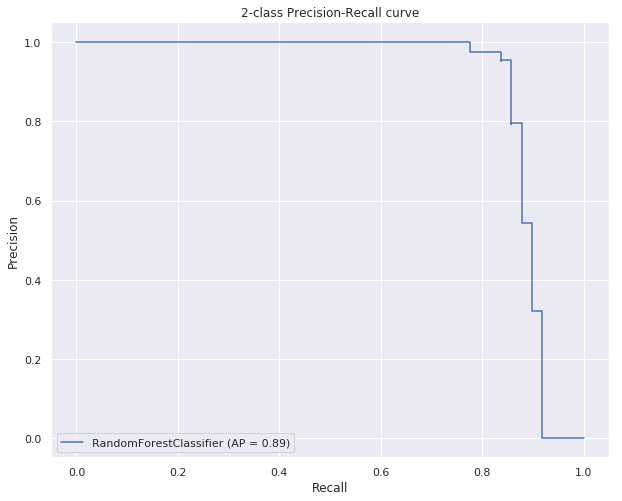

In [32]:
f = plt.figure(figsize=(10,8))
disp = plot_precision_recall_curve(rf_model, X_valid_sc, y_validation, ax=plt.gca())
disp.ax_.set_title('2-class Precision-Recall curve')

plt.show()

Adaboost 

In [34]:
ada_model = AdaBoostClassifier()

#fitting
ada_model.fit(X_train_sc, y_train)

#predict
predicts = ada_model.predict(X_valid_sc)

In [35]:
print('confusion matrix: \n', confusion_matrix(y_validation, predicts))
print('report: \n', classification_report(y_validation, predicts))

confusion matrix: 
 [[28422    10]
 [    9    40]]
report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     28432
           1       0.80      0.82      0.81        49

    accuracy                           1.00     28481
   macro avg       0.90      0.91      0.90     28481
weighted avg       1.00      1.00      1.00     28481



**CV for Sasha**

In [36]:
from sklearn.model_selection import KFold

In [ ]:
#Splitting to train test and doing kfold 
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2)
kfold = KFold(n_splits=5)

alphas = np.arange(0.01, 1, 0.01)
result_dict = {}
for alpha in alphas:
    mse_list = []

    for train, test in kfold.split(X_train):
            model = Ridge(normalize=True, alpha=alpha)
            model = model.fit(X_train[train], y_train.iloc[train])
            y_pred = model.predict(X_train[test])
            mse_list.append(mean_squared_error(y_train.iloc[test], y_pred))
            
    result_dict[alpha] = sum(mse_list) / kfold.n_splits

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

sc = StandardScaler()

X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)


kfold = KFold(n_splits=5)

recall_list = []
f1_list = []
precision_list = [] 

for train, test in kfold.split(X_train_sc):
    model = LogisticRegression()
    model.fit(X_train_sc[train], y_train.iloc[train])
    y_pred = model.predict(X_train_sc[test])
    recall_list.append(recall_score(y_train.iloc[test], y_pred))
    f1_list.append(f1_score(y_train.iloc[test], y_pred))
    precision_list.append(precision_score(y_train.iloc[test], y_pred))


    
    

In [53]:
print('mean recall: ',np.mean(recall_list))
print('std recall: ',np.std(recall_list))


print('mean f1: ',np.mean(f1_list))
print('std f1: ',np.std(f1_list))

print('mean precision: ',np.mean(precision_list))
print('std precision: ',np.std(precision_list))


mean recall:  0.6034478283900409
std recall:  0.026605046074110513
mean f1:  0.7065120096339097
std f1:  0.01374221102647065
mean precision:  0.8556170375745846
std precision:  0.04018614215898511


**Oversampling methods**

In [57]:
from sklearn.utils import resample

In [75]:
# concatenate our training data back together
X_oversampling = pd.concat([X_train, y_train], axis=1)

# separate minority and majority classes
not_fraud = X_oversampling[X_oversampling['Class']==0]
fraud = X_oversampling[X_oversampling['Class']==1]

#upsample minority
fraud_upsampled = resample(fraud,
                          replace=True, # sample with replacement
                          n_samples=len(not_fraud), # match number in majority class
                          random_state=27) # reproducible results
# combine majority and upsampled minority
upsampled = pd.concat([not_fraud, fraud_upsampled])

# check new class counts
upsampled['Class'].value_counts()

1    227451
0    227451
Name: Class, dtype: int64

In [76]:
X_train = upsampled.drop('Class', axis=1)
y_train = upsampled['Class']

In [77]:
ada_model = AdaBoostClassifier()

#fitting
ada_model.fit(X_train, y_train)

#predict
predicts = ada_model.predict(X_test)

In [78]:
print('confusion matrix: \n', confusion_matrix(y_test, predicts))
print('report: \n', classification_report(y_test, predicts))

confusion matrix: 
 [[27969   463]
 [    6    43]]
report: 
               precision    recall  f1-score   support

           0       1.00      0.98      0.99     28432
           1       0.08      0.88      0.15        49

    accuracy                           0.98     28481
   macro avg       0.54      0.93      0.57     28481
weighted avg       1.00      0.98      0.99     28481

